In [48]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

# plt.rcParams['figure.figsize'] = [10.0, 8.0]
plt.rcParams['figure.dpi'] = 200
plt.rc('legend',fontsize=16)




In [49]:
public_students_base_prefix = 'scuola/ALUCORSOINDCLASTA'
charter_students_base_prefix = 'scuola/ALUCORSOINDCLAPAR'
public_school_nation_prefix = 'scuola/ALUITASTRACITSTA'
charter_school_nation_prefix = 'scuola/ALUITASTRACITPAR'
public_school_prefix = 'scuola/SCUANAGRAFESTAT'
charter_school_prefix  = 'scuola/SCUANAGRAFEPAR'

years = ['20152016', '20162017', '20172018', '20182019', '20192020', '20202021', '20212022', '20222023']
dataframes = []

for current_year in years:
    print(f"Importing schools and students for year {current_year}")

    current_year_public_schools = pd.read_csv(f"{public_school_prefix}{current_year}.csv")
    current_year_charter_schools = pd.read_csv(f"{charter_school_prefix}{current_year}.csv")

    current_year_public_schools['PUBBLICA_PARITARIA'] = "PUBBLICA"
    current_year_charter_schools['PUBBLICA_PARITARIA'] = "PARITARIA"

    current_year_schools = pd.concat([current_year_public_schools, current_year_charter_schools], axis=0)
    
    
    current_year_schools.drop([
        'ANNOSCOLASTICO', 
        #'CODICEISTITUTORIFERIMENTO',
        #'DENOMINAZIONEISTITUTORIFERIMENTO',
        # 'DENOMINAZIONESCUOLA',
        'INDIRIZZOSCUOLA', 
        'CAPSCUOLA',
        'DESCRIZIONECARATTERISTICASCUOLA', 
        'DESCRIZIONETIPOLOGIAGRADOISTRUZIONESCUOLA',
        'INDICAZIONESEDEDIRETTIVO',
        'INDICAZIONESEDEOMNICOMPRENSIVO',
        'INDIRIZZOEMAILSCUOLA',
        'INDIRIZZOPECSCUOLA',
        'SITOWEBSCUOLA',
        'SEDESCOLASTICA'
    ], axis=1, inplace=True)
    
    print(f"Schools for {current_year}: {current_year_schools.shape}")

    current_year_public_students = pd.read_csv(f"{public_students_base_prefix}{current_year}.csv")
    current_year_charter_students = pd.read_csv(f"{charter_students_base_prefix}{current_year}.csv")
    current_year_students = pd.concat([current_year_public_students, current_year_charter_students], axis=0)

    print(f"Students for {current_year}: {current_year_students.shape}")

    merged = current_year_students.merge(current_year_schools, on="CODICESCUOLA", how="inner")

    print(f"Merged for {current_year}: {merged.shape}")
    
    print("\n")
    
    dataframes.append(merged)

    
df = pd.concat(dataframes, axis=0)

df.reset_index()
df['ALUNNITOT'] = df['ALUNNIMASCHI'] + df['ALUNNIFEMMINE']
df.to_csv("scuola/students_schools_years.csv")

Importing schools and students for year 20152016
Schools for 20152016: (64540, 10)
Students for 20152016: (134872, 7)
Merged for 20152016: (134872, 16)


Importing schools and students for year 20162017
Schools for 20162017: (64381, 10)
Students for 20162017: (134997, 7)
Merged for 20162017: (134997, 16)


Importing schools and students for year 20172018
Schools for 20172018: (64151, 10)
Students for 20172018: (134008, 7)
Merged for 20172018: (134008, 16)


Importing schools and students for year 20182019
Schools for 20182019: (63942, 10)
Students for 20182019: (133761, 7)
Merged for 20182019: (133761, 16)


Importing schools and students for year 20192020
Schools for 20192020: (63767, 10)
Students for 20192020: (133154, 7)
Merged for 20192020: (133154, 16)


Importing schools and students for year 20202021
Schools for 20202021: (63494, 10)
Students for 20202021: (133306, 7)
Merged for 20202021: (133306, 16)


Importing schools and students for year 20212022
Schools for 20212022: (6328

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1070684 entries, 0 to 133201
Data columns (total 17 columns):
 #   Column                            Non-Null Count    Dtype 
---  ------                            --------------    ----- 
 0   ANNOSCOLASTICO                    1070684 non-null  int64 
 1   CODICESCUOLA                      1070684 non-null  object
 2   ORDINESCUOLA                      1070684 non-null  object
 3   ANNOCORSOCLASSE                   1070684 non-null  int64 
 4   CLASSI                            1070684 non-null  int64 
 5   ALUNNIMASCHI                      1070684 non-null  int64 
 6   ALUNNIFEMMINE                     1070684 non-null  int64 
 7   AREAGEOGRAFICA                    1070684 non-null  object
 8   REGIONE                           1070684 non-null  object
 9   PROVINCIA                         1070684 non-null  object
 10  CODICEISTITUTORIFERIMENTO         950067 non-null   object
 11  DENOMINAZIONEISTITUTORIFERIMENTO  950067 non-null  

In [51]:
# df_schools[
#     (df_schools['DESCRIZIONETIPOLOGIAGRADOISTRUZIONESCUOLA'].isin(["SCUOLA PRIMO GRADO"])) &
#     (df_schools['DESCRIZIONECOMUNE'].isin(["PALO DEL COLLE"]))
# ][['ANNOSCOLASTICO', 'DENOMINAZIONEISTITUTORIFERIMENTO', 'CODICESCUOLA']]

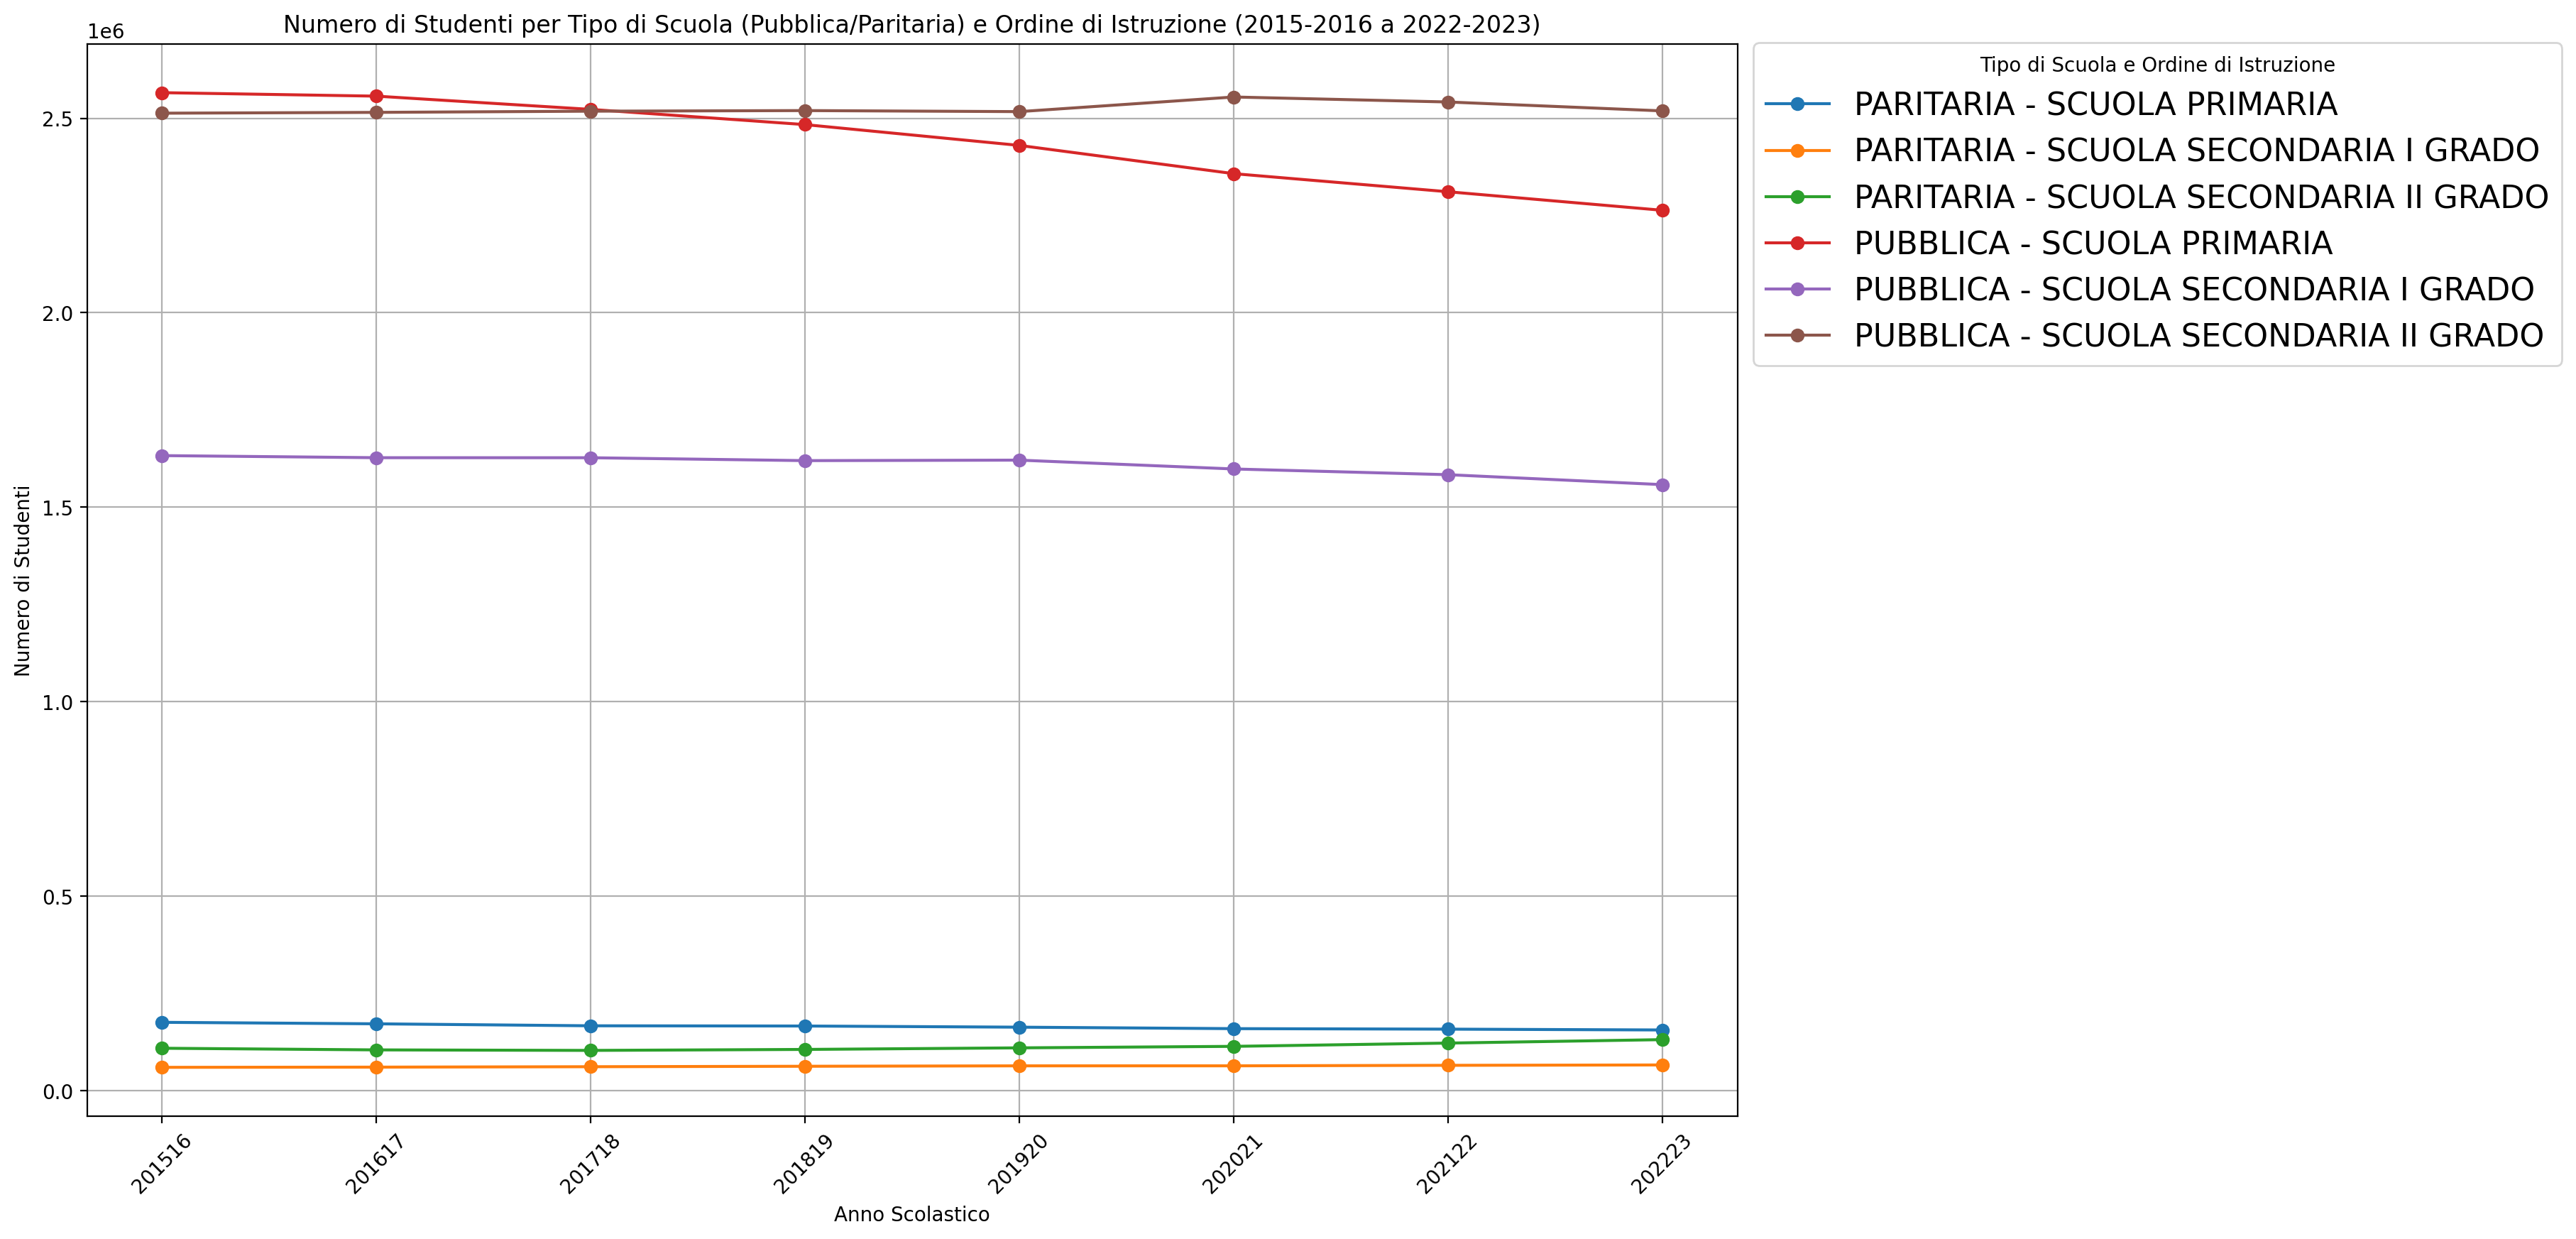

In [90]:
students_by_year_type_order_reloaded = df.groupby(['ANNOSCOLASTICO', 'PUBBLICA_PARITARIA', 'ORDINESCUOLA'])['ALUNNITOT'].sum().unstack([1, 2])

# Create line plots for the number of students for each combination of school type and order over the years
plt.figure(figsize=(15, 10))

for column in students_by_year_type_order_reloaded.columns:
    plt.plot(students_by_year_type_order_reloaded.index, students_by_year_type_order_reloaded[column], marker='o', label=f'{column[0]} - {column[1]}')

plt.title('Numero di Studenti per Tipo di Scuola (Pubblica/Paritaria) e Ordine di Istruzione (2015-2016 a 2022-2023)')
plt.xlabel('Anno Scolastico')
plt.ylabel('Numero di Studenti')
plt.xticks(students_by_year_type_order_reloaded.index, rotation=45)
plt.legend(title='Tipo di Scuola e Ordine di Istruzione', bbox_to_anchor=(1, 1.016), loc='upper left')
plt.grid(True)

# Show the plot
# plt.tight_layout()
plt.show()

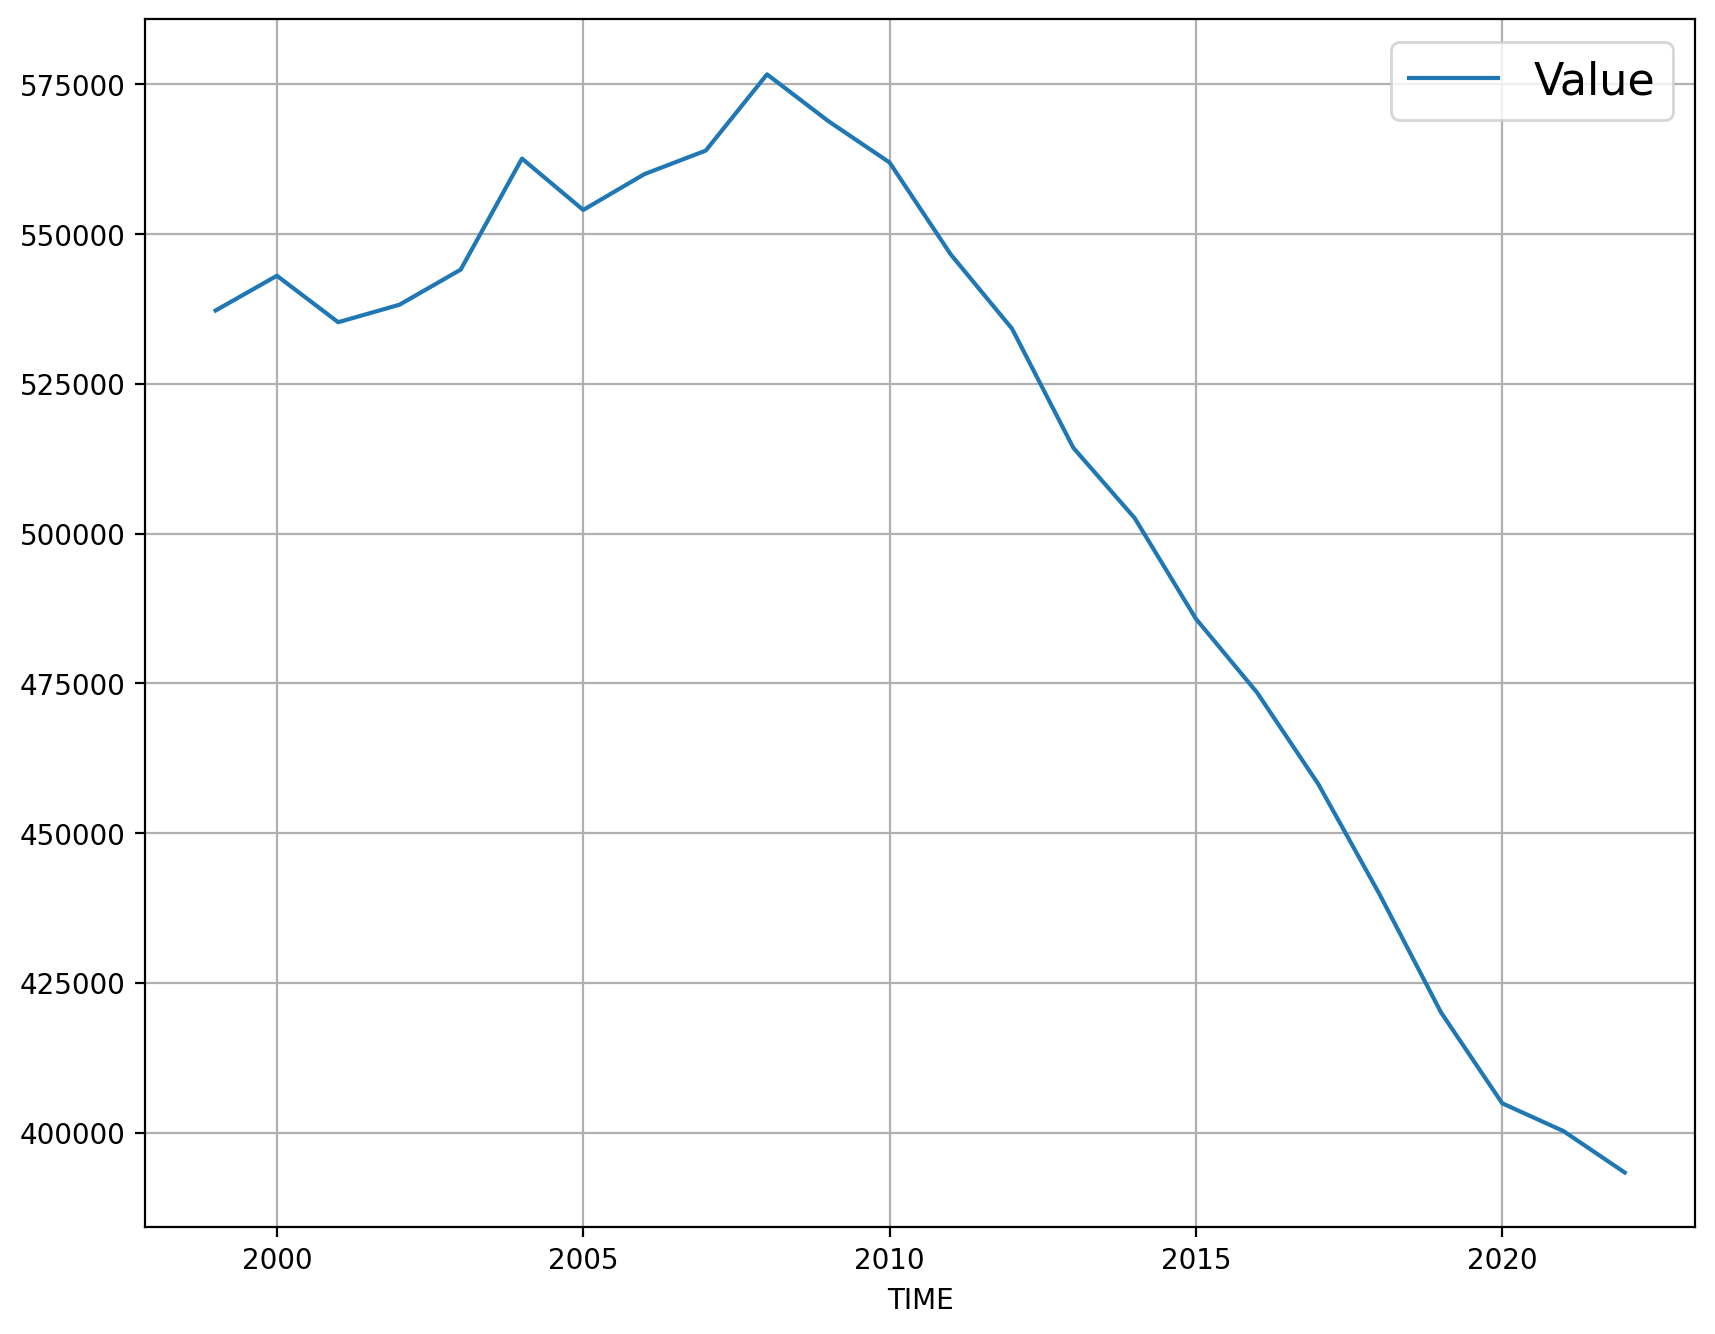

In [53]:
df_births = pd.read_csv("scuola/DCIS_NATI2_15012024122044855 - DCIS_NATI2_15012024122044855.csv")

df_births[
    (df_births['Territorio'].isin(["Italia"]))
].plot(x="TIME", y="Value")
plt.grid(True)
plt.show()

In [54]:
df_births['Territorio'].unique()

array(['Italia', 'Nord-ovest', 'Piemonte', 'Monza e della Brianza',
       'Fermo', 'Barletta-Andria-Trani', 'Sud Sardegna', 'Torino',
       'Verbano-Cusio-Ossola', 'Biella', 'Cuneo', 'Vercelli', 'Novara',
       'Alessandria', 'Liguria', 'Savona',
       "Valle d'Aosta / Vallée d'Aoste", 'Imperia', 'Asti', 'Varese',
       'Genova', 'La Spezia', 'Como', 'Lombardia', 'Lecco', 'Sondrio',
       'Brescia', 'Bergamo', 'Milano', 'Pavia', 'Lodi', 'Cremona',
       'Nord-est', 'Bolzano / Bozen', 'Provincia Autonoma Trento', 'Nord',
       'Mantova', 'Provincia Autonoma Bolzano / Bozen', 'Trento',
       'Vicenza', 'Venezia', 'Veneto', 'Belluno', 'Treviso', 'Verona',
       'Friuli-Venezia Giulia', 'Gorizia', 'Rovigo', 'Udine', 'Padova',
       'Pordenone', 'Piacenza', 'Modena', 'Trieste', 'Parma', 'Bologna',
       "Reggio nell'Emilia", 'Emilia-Romagna', 'Ferrara', 'Rimini',
       'Ravenna', 'Centro', 'Trentino Alto Adige / Südtirol',
       'Forlì-Cesena', 'Toscana', 'Pistoia', 'Livorno',

In [55]:
df['ORDINESCUOLA'].unique()

array(['SCUOLA PRIMARIA', 'SCUOLA SECONDARIA I GRADO',
       'SCUOLA SECONDARIA II GRADO'], dtype=object)

/var/folders/bp/vpf4133s7wjb10lznth5p4900000gn/T/ipykernel_15543/250790578.py:30: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


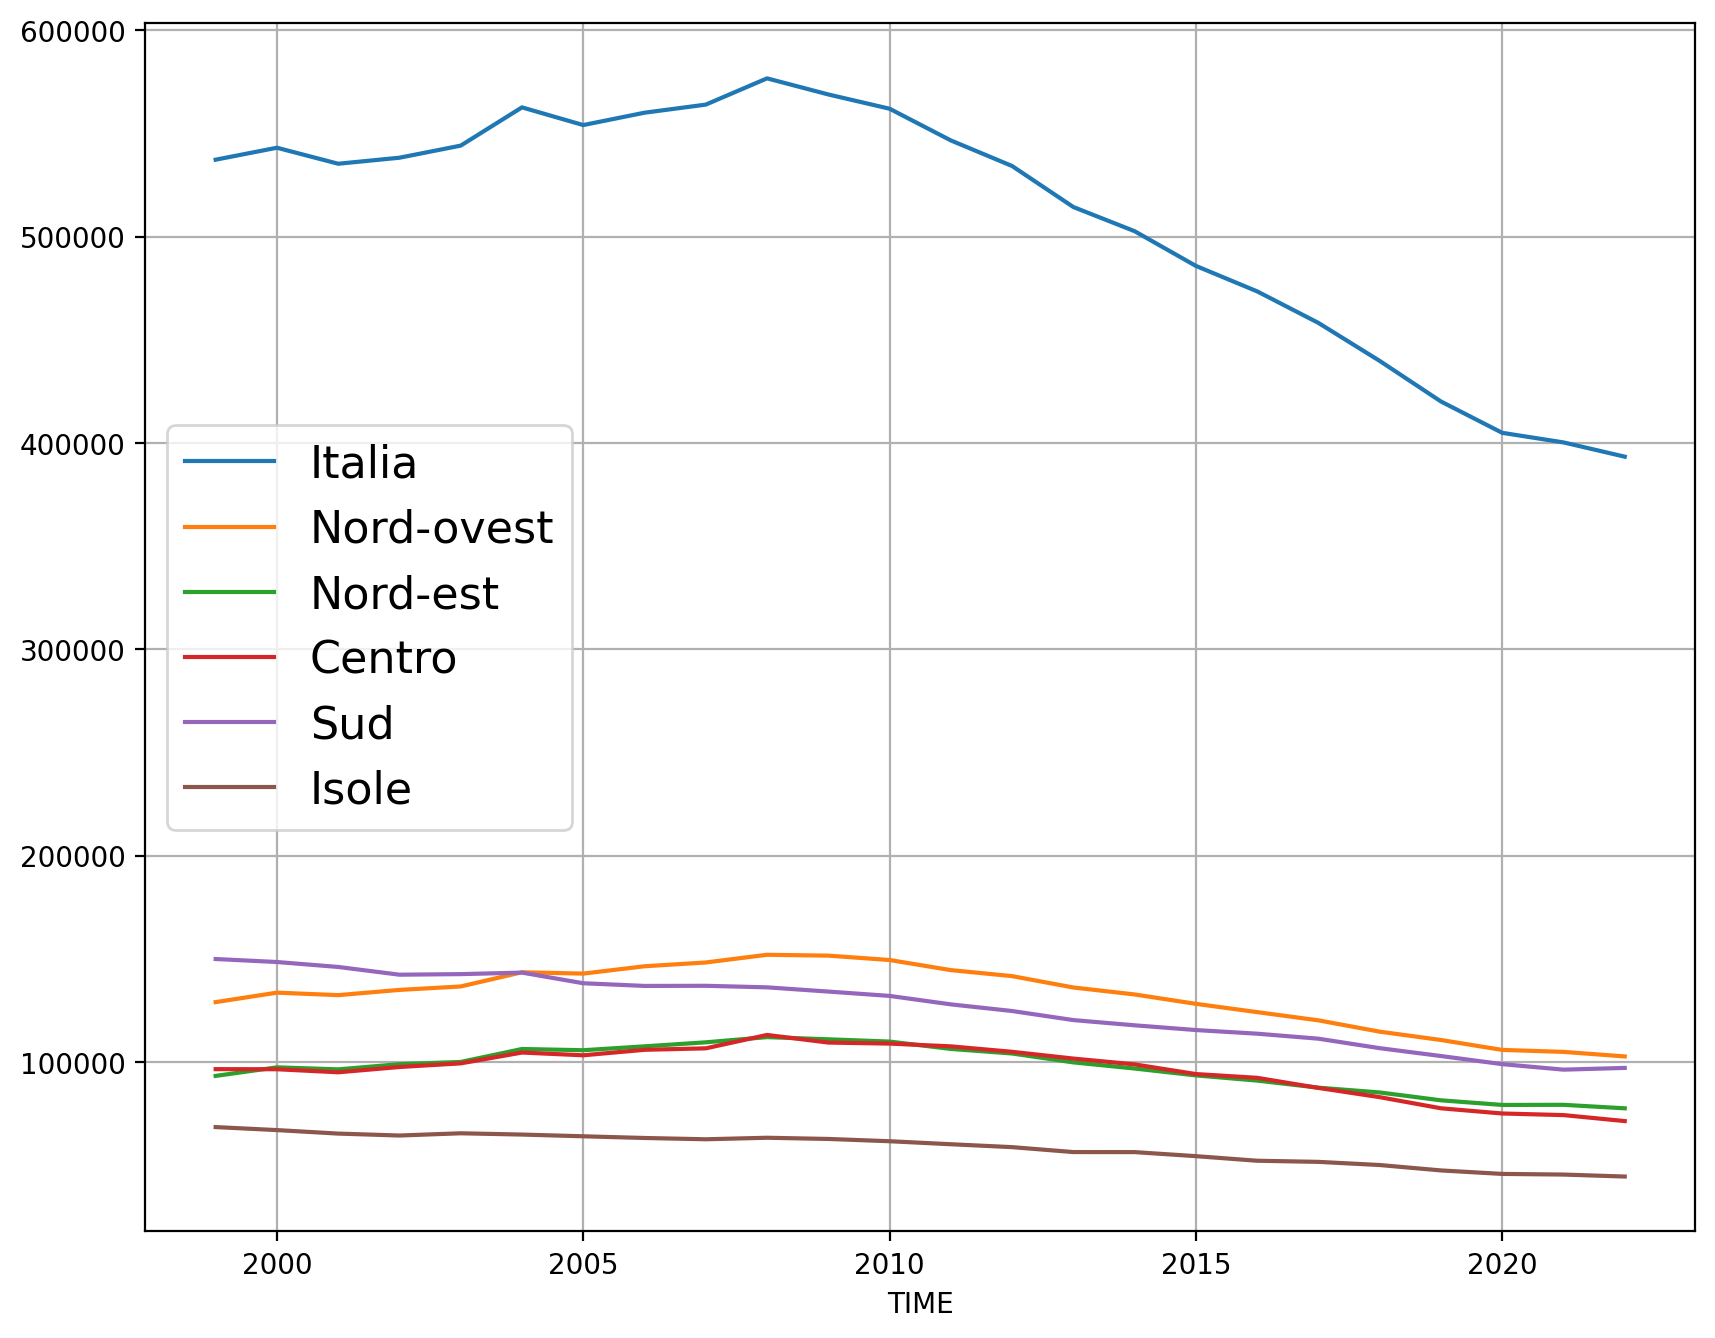

In [56]:
fig, ax = plt.subplots()

df_births[
    (df_births['Territorio'].isin(["Italia"]))
].plot(kind="line", x="TIME", y="Value", ax=ax)

df_births[
    (df_births['Territorio'].isin(["Nord-ovest"]))
].plot(kind="line", x="TIME", y="Value", ax=ax)

df_births[
    (df_births['Territorio'].isin(["Nord-est"]))
].plot(kind="line", x="TIME", y="Value", ax=ax)

df_births[
    (df_births['Territorio'].isin(["Centro"]))
].plot(kind="line", x="TIME", y="Value", ax=ax)

df_births[
    (df_births['Territorio'].isin(["Sud"]))
].plot(kind="line", x="TIME", y="Value", ax=ax)

df_births[
    (df_births['Territorio'].isin(["Isole"]))
].plot(kind="line", x="TIME", y="Value", ax=ax)

plt.legend(["Italia", "Nord-ovest", "Nord-est", "Centro", "Sud", "Isole"]);
plt.grid()

fig.show()


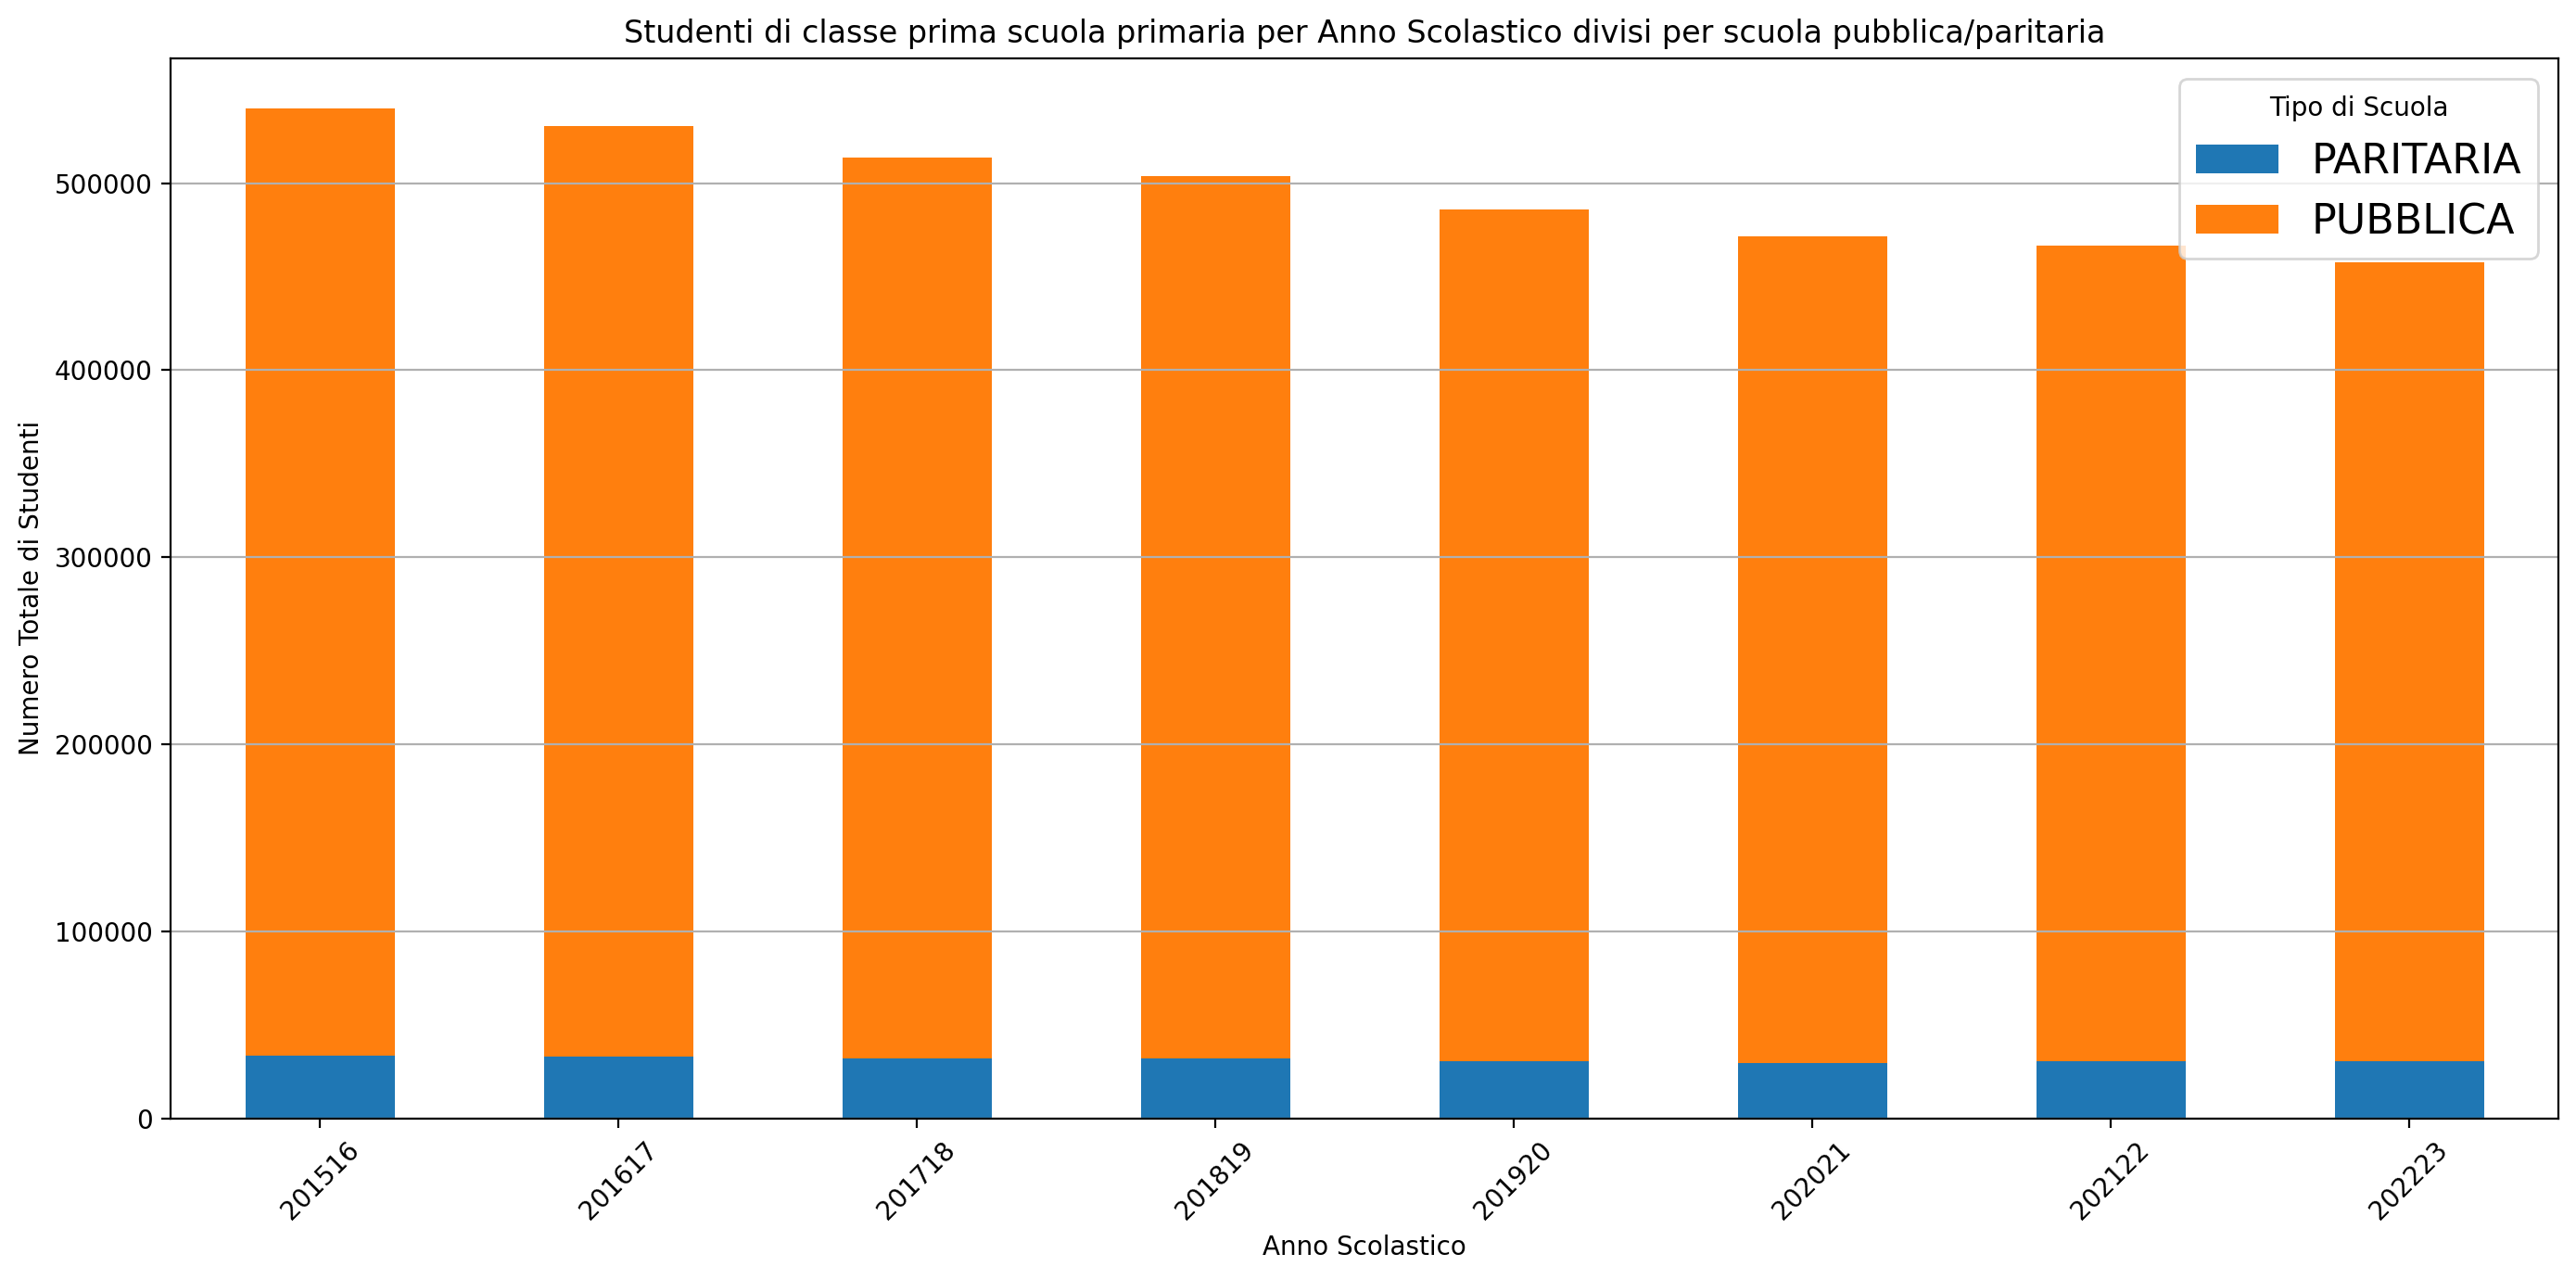

In [57]:
totals_by_year_public_private = df[
    (df['ANNOCORSOCLASSE'].isin([1])) & 
    df['ORDINESCUOLA'].isin(["SCUOLA PRIMARIA"])
].groupby(['ANNOSCOLASTICO', 'PUBBLICA_PARITARIA'])['ALUNNITOT'].sum().unstack()

# Creare un grafico a barre impilate
totals_by_year_public_private.plot(kind='bar', stacked=True, figsize=(14, 7))

# Aggiungere titolo e etichette
plt.title('Studenti di classe prima scuola primaria per Anno Scolastico divisi per scuola pubblica/paritaria')
plt.xlabel('Anno Scolastico')
plt.ylabel('Numero Totale di Studenti')
plt.legend(title='Tipo di Scuola')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Mostrare il grafico
plt.tight_layout()
plt.show()

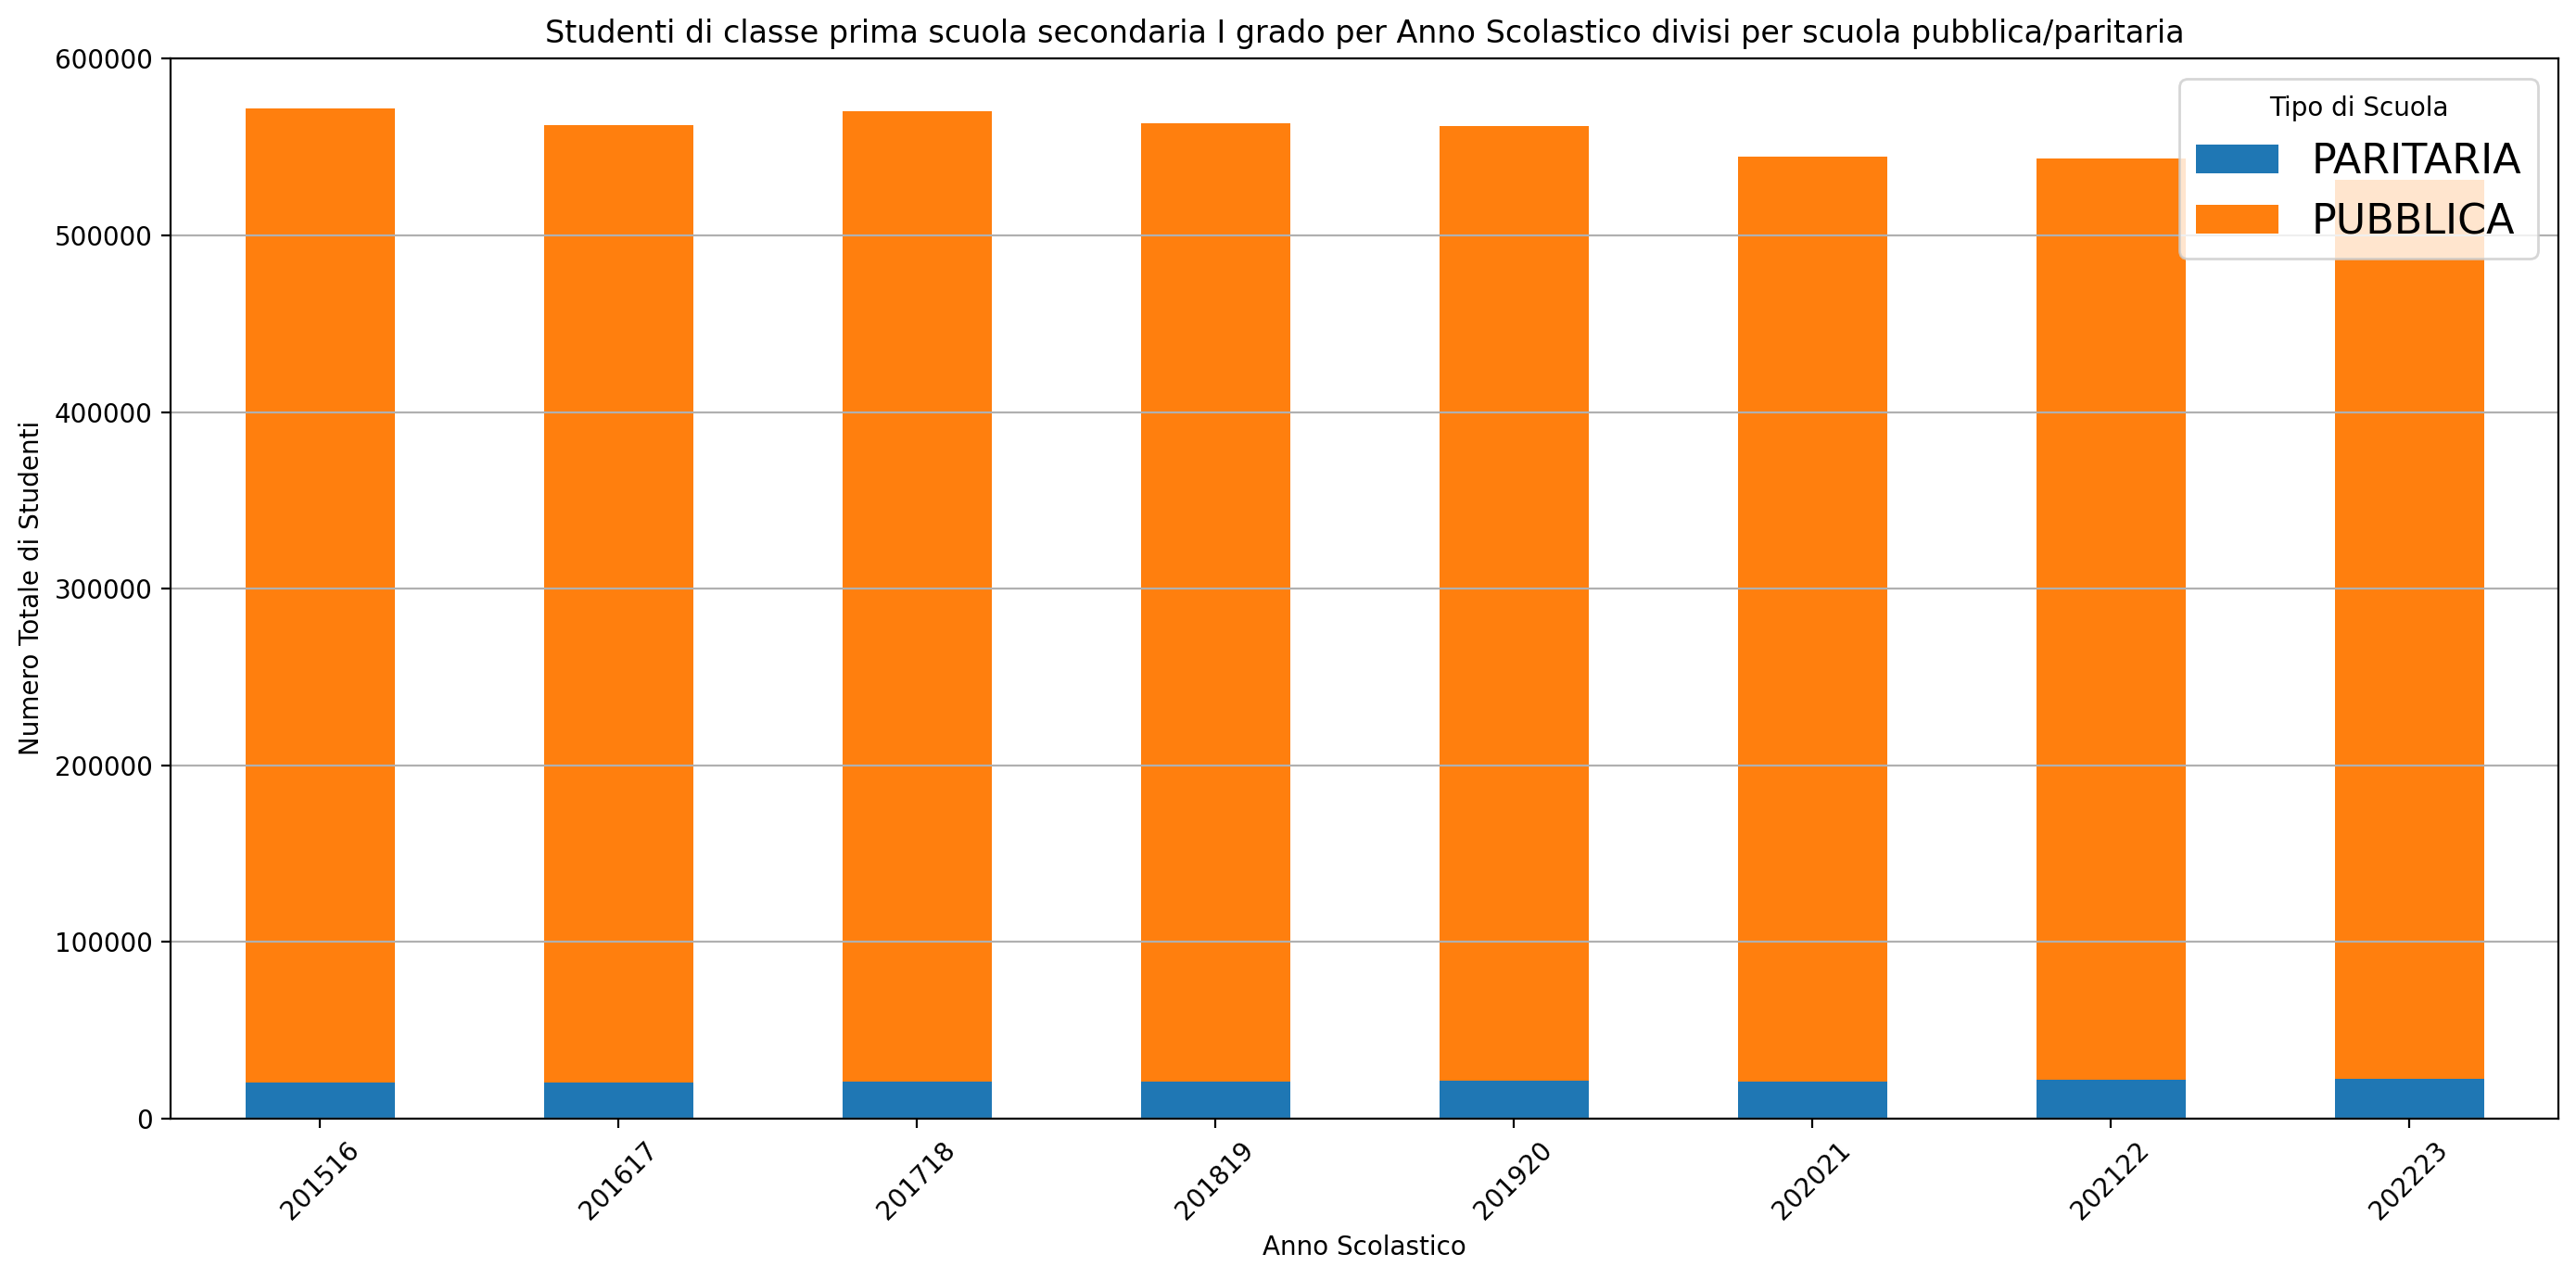

In [58]:
data = df[
    (df['ANNOCORSOCLASSE'].isin([1])) & 
    df['ORDINESCUOLA'].isin(["SCUOLA SECONDARIA I GRADO"])
].groupby(['ANNOSCOLASTICO', 'PUBBLICA_PARITARIA'])['ALUNNITOT'].sum().unstack()

# Creare un grafico a barre impilate
data.plot(kind='bar', stacked=True, figsize=(14, 7))

# Aggiungere titolo e etichette
plt.title('Studenti di classe prima scuola secondaria I grado per Anno Scolastico divisi per scuola pubblica/paritaria')
plt.xlabel('Anno Scolastico')
plt.ylabel('Numero Totale di Studenti')
plt.legend(title='Tipo di Scuola')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Mostrare il grafico
plt.tight_layout()
plt.show()

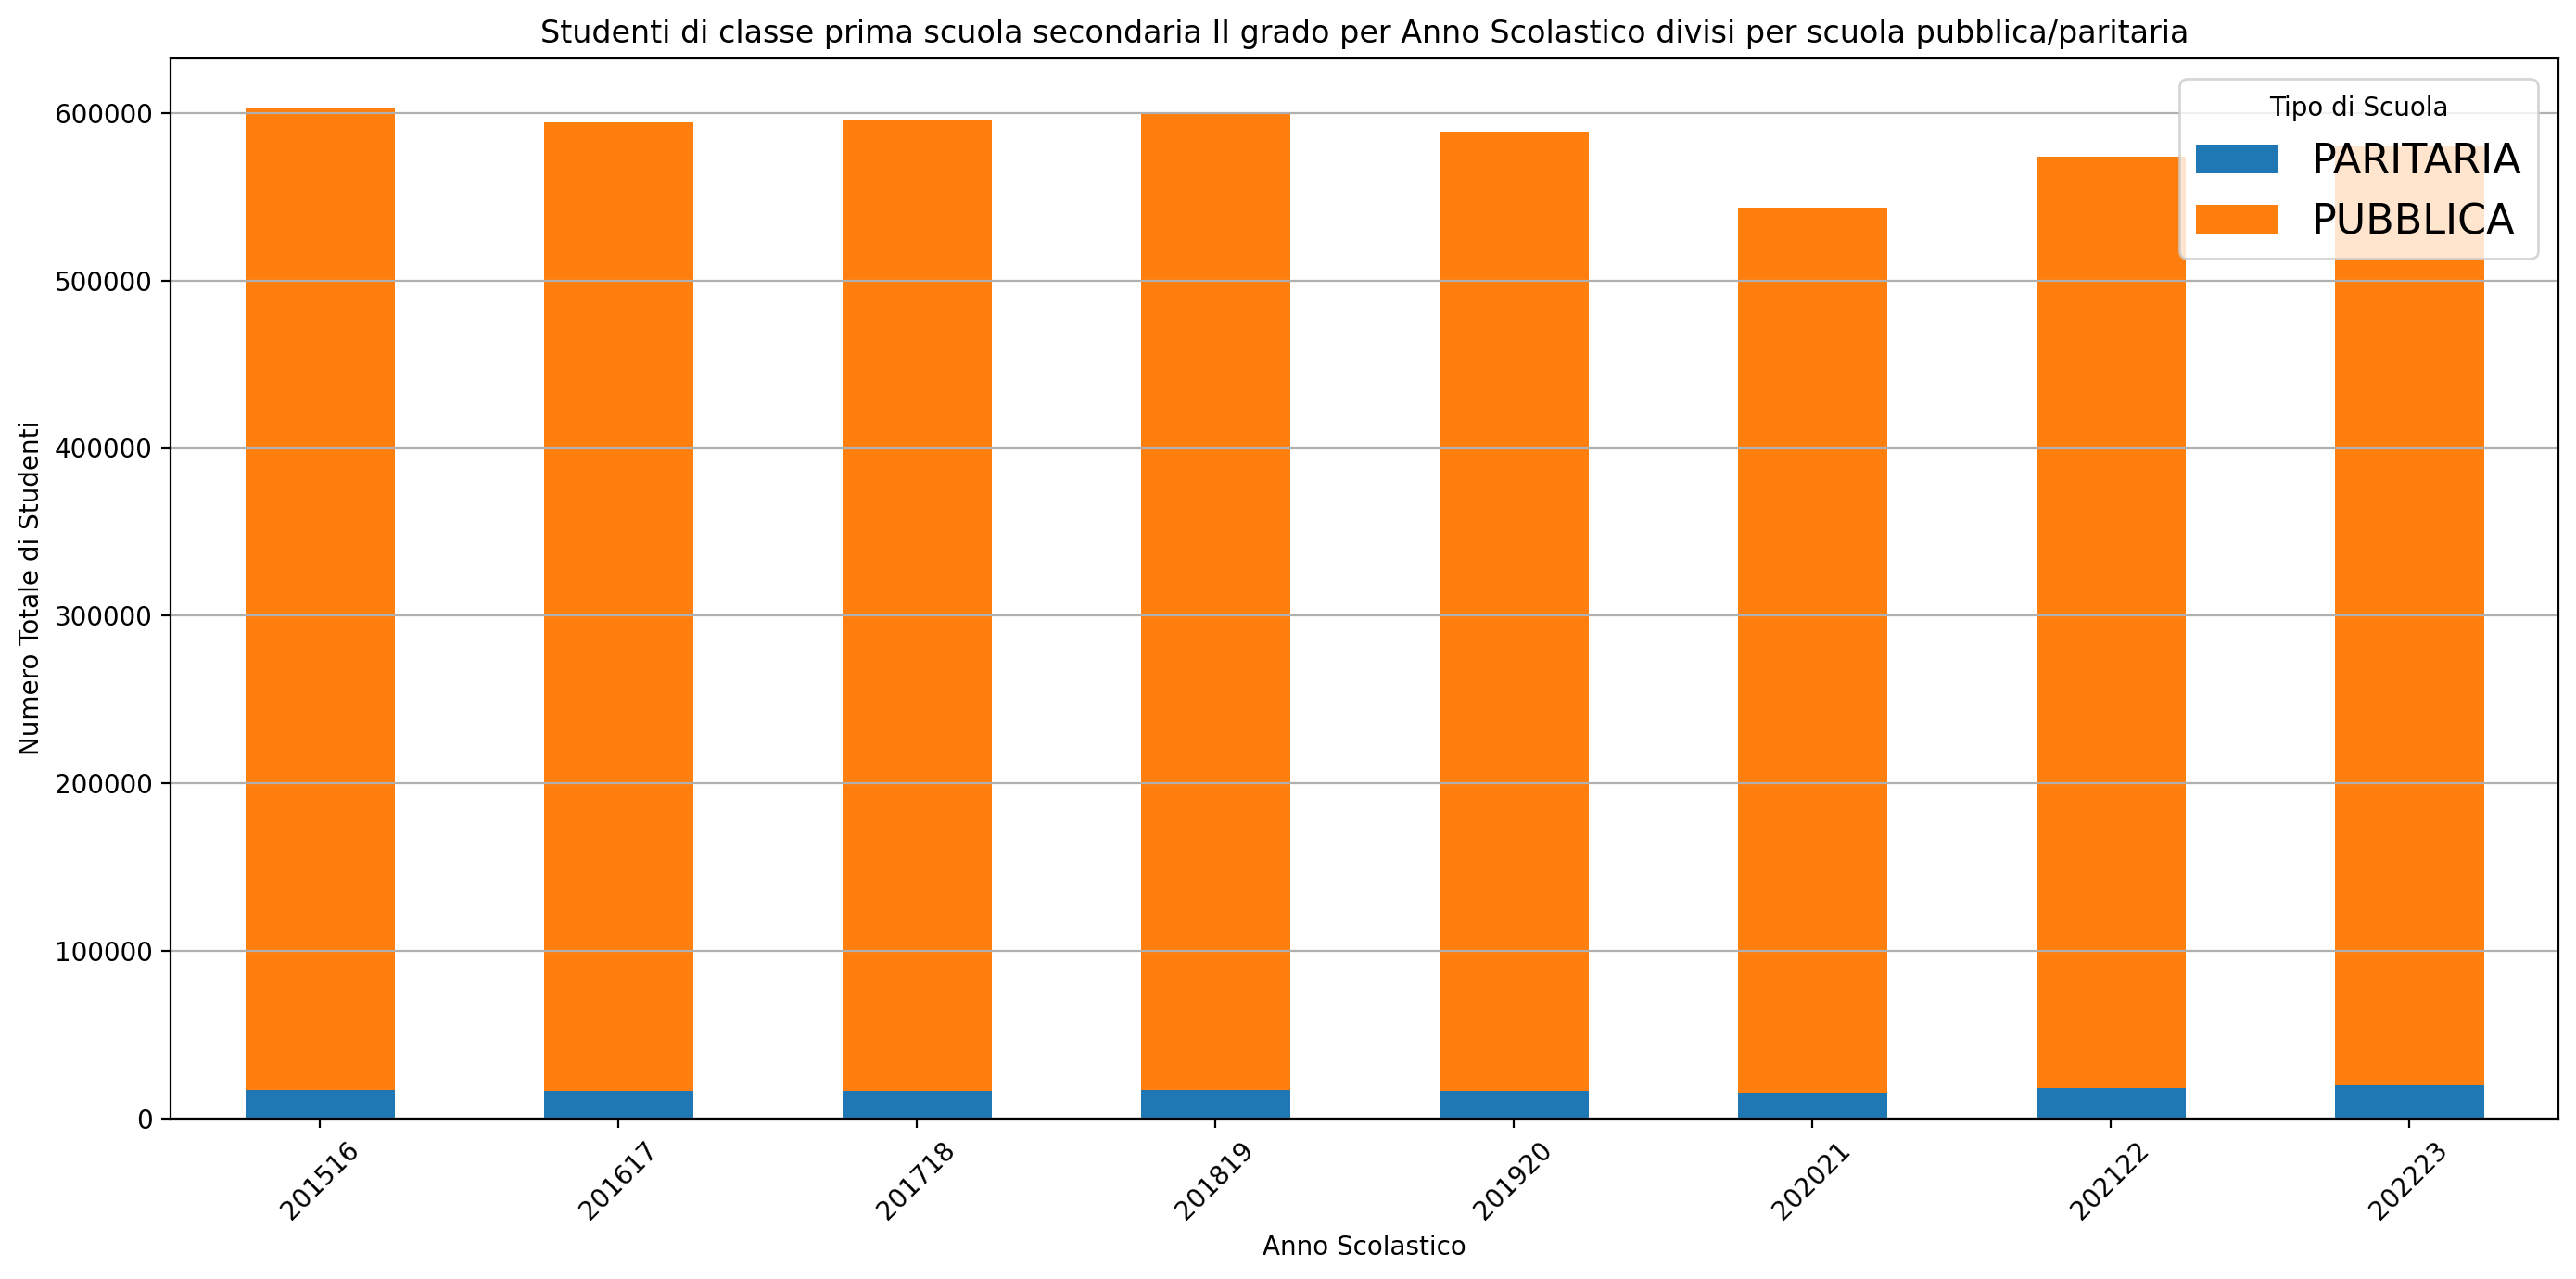

In [59]:
data = df[
    (df['ANNOCORSOCLASSE'].isin([1])) & 
    df['ORDINESCUOLA'].isin(["SCUOLA SECONDARIA II GRADO"])
].groupby(['ANNOSCOLASTICO', 'PUBBLICA_PARITARIA'])['ALUNNITOT'].sum().unstack()

# Creare un grafico a barre impilate
data.plot(kind='bar', stacked=True, figsize=(14, 7))

# Aggiungere titolo e etichette
plt.title('Studenti di classe prima scuola secondaria II grado per Anno Scolastico divisi per scuola pubblica/paritaria')
plt.xlabel('Anno Scolastico')
plt.ylabel('Numero Totale di Studenti')
plt.legend(title='Tipo di Scuola')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Mostrare il grafico
plt.tight_layout()
plt.show()

In [60]:
df[
    (df['ANNOCORSOCLASSE'].isin([1])) & 
    df['ORDINESCUOLA'].isin(["SCUOLA PRIMARIA"])
].pivot_table(
    values="ALUNNITOT",
    columns=['ANNOSCOLASTICO', "PUBBLICA_PARITARIA"], aggfunc="sum"
)

ANNOSCOLASTICO        201516             201617             201718           \
PUBBLICA_PARITARIA PARITARIA PUBBLICA PARITARIA PUBBLICA PARITARIA PUBBLICA   
ALUNNITOT              33415   506428     33163   497362     31930   481586   

ANNOSCOLASTICO        201819             201920             202021           \
PUBBLICA_PARITARIA PARITARIA PUBBLICA PARITARIA PUBBLICA PARITARIA PUBBLICA   
ALUNNITOT              31919   471721     30583   455560     29738   441880   

ANNOSCOLASTICO        202122             202223           
PUBBLICA_PARITARIA PARITARIA PUBBLICA PARITARIA PUBBLICA  
ALUNNITOT              30516   436173     30560   427338

In [61]:
df[
    (df['ANNOCORSOCLASSE'].isin([1])) & 
    df['ORDINESCUOLA'].isin(["SCUOLA SECONDARIA I GRADO"])
].pivot_table(
    values="ALUNNITOT",
    columns=['ANNOSCOLASTICO', "PUBBLICA_PARITARIA"], aggfunc="sum"
)

ANNOSCOLASTICO        201516             201617             201718           \
PUBBLICA_PARITARIA PARITARIA PUBBLICA PARITARIA PUBBLICA PARITARIA PUBBLICA   
ALUNNITOT              20177   551636     20247   542143     21062   549120   

ANNOSCOLASTICO        201819             201920             202021           \
PUBBLICA_PARITARIA PARITARIA PUBBLICA PARITARIA PUBBLICA PARITARIA PUBBLICA   
ALUNNITOT              21144   542163     21485   540435     21095   523369   

ANNOSCOLASTICO        202122             202223           
PUBBLICA_PARITARIA PARITARIA PUBBLICA PARITARIA PUBBLICA  
ALUNNITOT              22005   521781     22278   509348

In [62]:
df[
    (df['ANNOCORSOCLASSE'].isin([1])) & 
    df['ORDINESCUOLA'].isin(["SCUOLA SECONDARIA II GRADO"])
].pivot_table(
    values="ALUNNITOT",
    columns=['ANNOSCOLASTICO', "PUBBLICA_PARITARIA"], aggfunc="sum"
)

ANNOSCOLASTICO        201516             201617             201718           \
PUBBLICA_PARITARIA PARITARIA PUBBLICA PARITARIA PUBBLICA PARITARIA PUBBLICA   
ALUNNITOT              17248   585329     16244   577992     16622   579015   

ANNOSCOLASTICO        201819             201920             202021           \
PUBBLICA_PARITARIA PARITARIA PUBBLICA PARITARIA PUBBLICA PARITARIA PUBBLICA   
ALUNNITOT              17053   582030     16705   572211     15138   528472   

ANNOSCOLASTICO        202122             202223           
PUBBLICA_PARITARIA PARITARIA PUBBLICA PARITARIA PUBBLICA  
ALUNNITOT              18175   555746     19675   560039

In [99]:
import pandas as pd
import matplotlib.pyplot as plt

# Carica il dataset degli studenti

# Prepara i dati per l'analisi
primary_first_class = df[
    (df['ANNOCORSOCLASSE'] == 1) & 
    (df['ORDINESCUOLA'] == "SCUOLA PRIMARIA")
].groupby('ANNOSCOLASTICO')['ALUNNITOT'].sum()

lower_secondary_first_class = df[
    (df['ANNOCORSOCLASSE'] == 1) & 
    (df['ORDINESCUOLA'] == "SCUOLA SECONDARIA I GRADO")
].groupby('ANNOSCOLASTICO')['ALUNNITOT'].sum()

upper_secondary_first_class = df[
    (df['ANNOCORSOCLASSE'] == 1) & 
    (df['ORDINESCUOLA'] == "SCUOLA SECONDARIA II GRADO")
].groupby('ANNOSCOLASTICO')['ALUNNITOT'].sum()


births = pd.Series(df_births[
    (df_births['TIME'] > 2008) & 
    (df_births['TIME'] < 2017) & 
    (df_births['Territorio'].isin(["Italia"]))
]['Value'].values, index=upper_secondary_first_class.index.values)


#pd.Series(arr, index = [0, 1, 2, 3, 4, 5])

# Creiamo un DataFrame per l'analisi
enrollment_data = pd.DataFrame({
    'Iscritti prime primaria': primary_first_class,
    'Iscritti prime secondaria I grado': lower_secondary_first_class,
    'Iscritti prime secondaria II grado': upper_secondary_first_class,
    'Nascite periodo 2009-2016': births
})

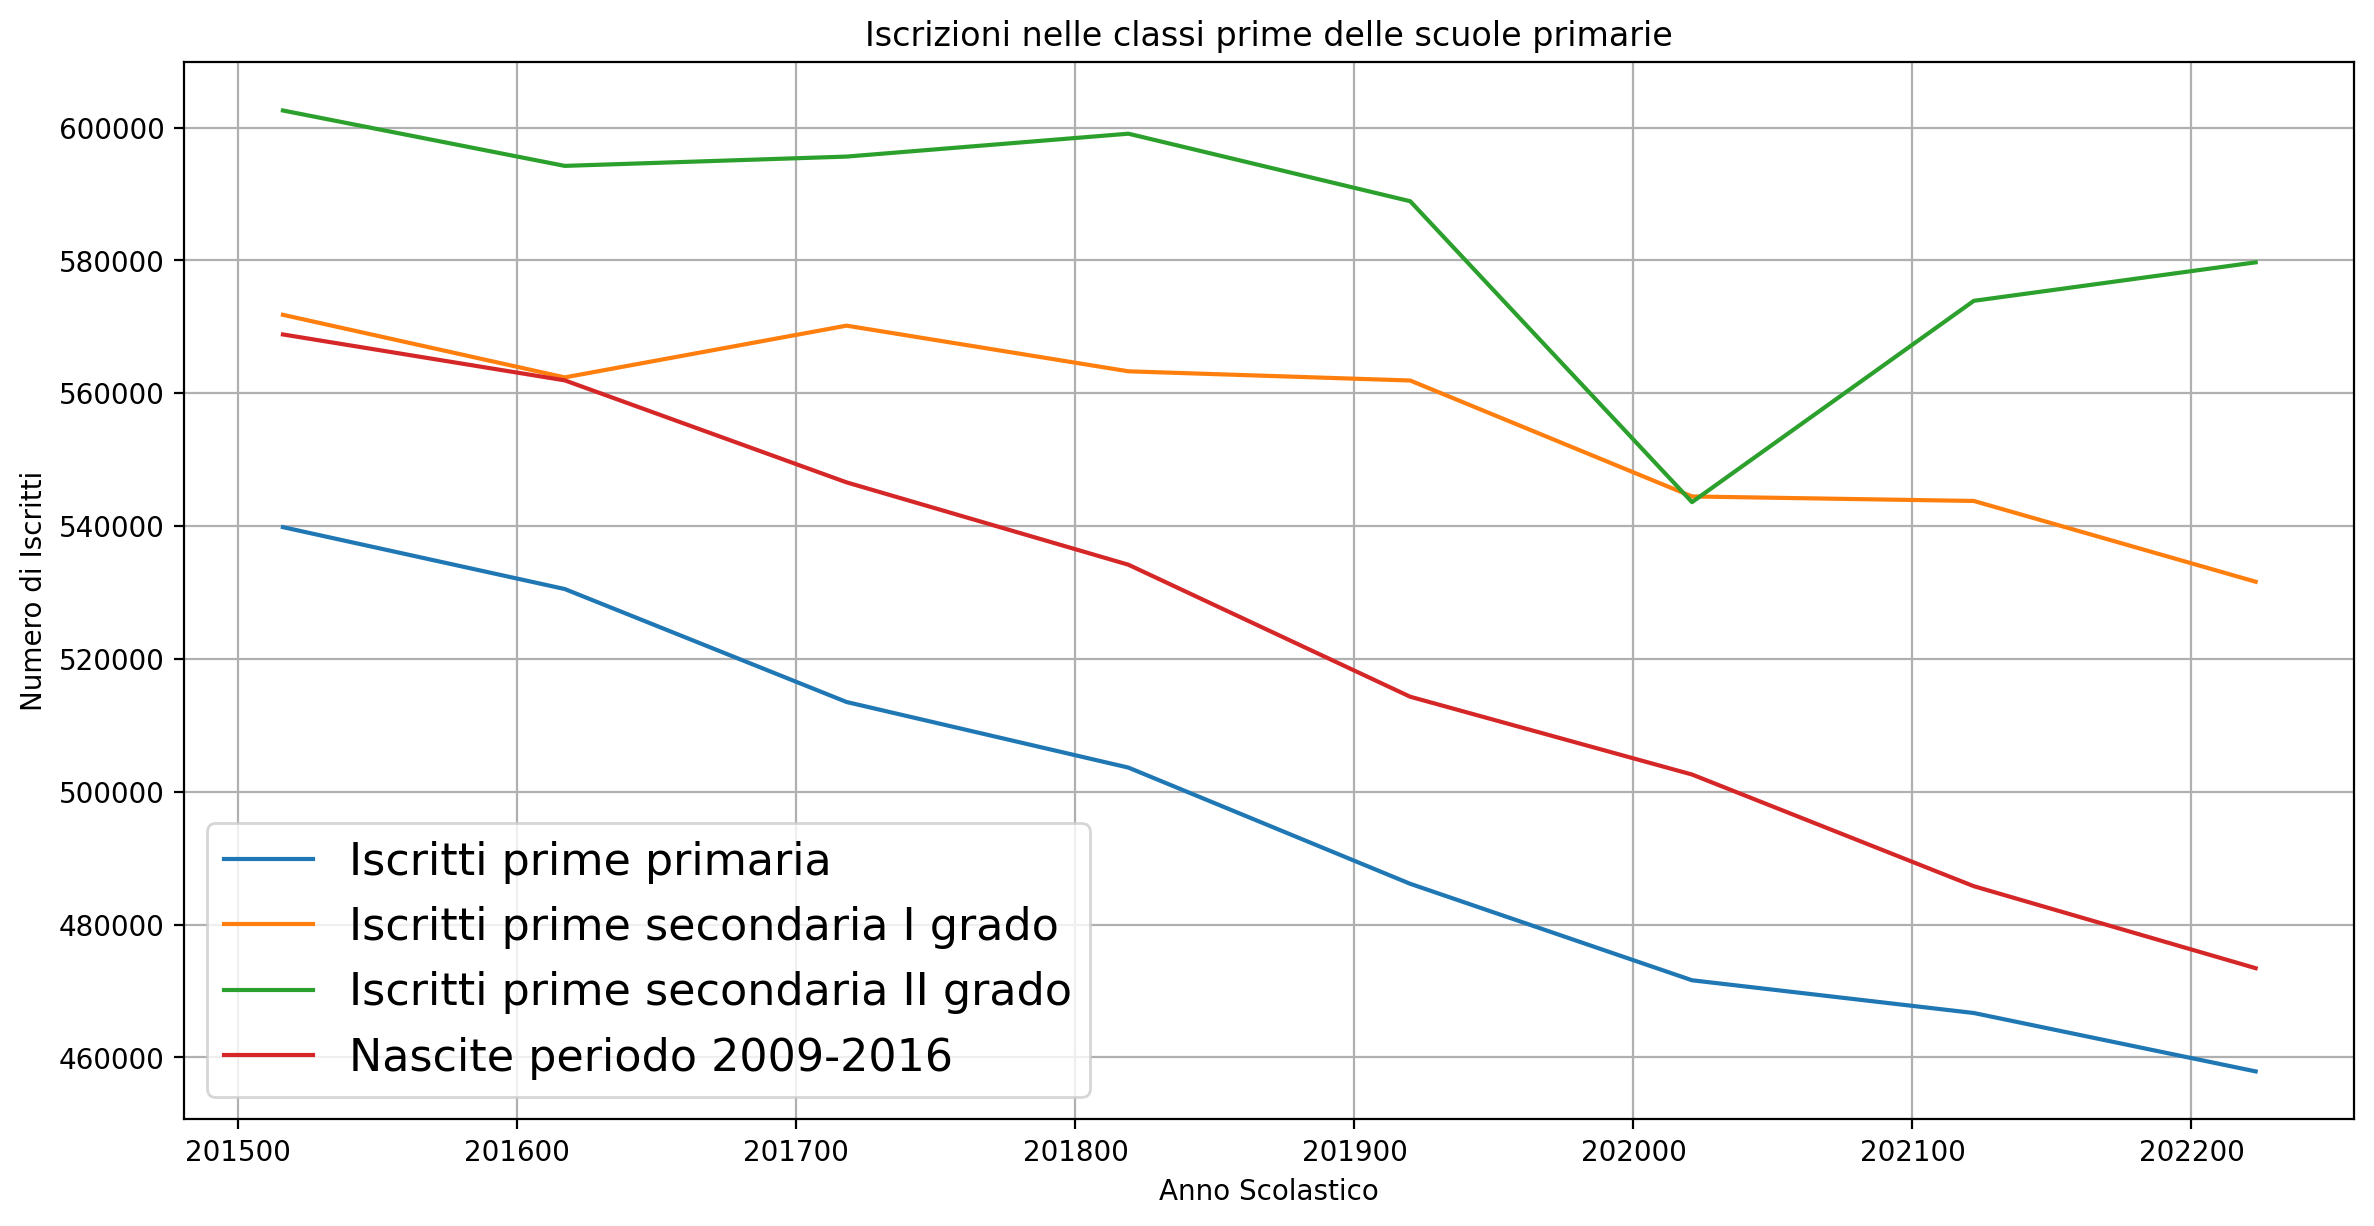

In [100]:
# Puliamo i dati eliminando eventuali anni mancanti tra le serie
enrollment_data.dropna(inplace=True)

# Grafico dell'andamento degli iscritti alle prime classi nei vari ordini di scuola
enrollment_data.plot(kind='line', figsize=(14, 7))

# Aggiungere titolo e etichette
plt.title('Iscrizioni nelle classi prime delle scuole primarie')
plt.xlabel('Anno Scolastico')
plt.ylabel('Numero di Iscritti')
plt.grid(True)
plt.legend()

# Mostrare il grafico
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carica il dataset degli studenti

# Prepara i dati per l'analisi
primary_first_class = df[
    (df['ANNOCORSOCLASSE'] == 1) & 
    (df['ORDINESCUOLA'] == "SCUOLA PRIMARIA")
].groupby('ANNOSCOLASTICO')['ALUNNITOT'].sum()

lower_secondary_first_class = df[
    (df['ANNOCORSOCLASSE'] == 1) & 
    (df['ORDINESCUOLA'] == "SCUOLA SECONDARIA I GRADO")
].groupby('ANNOSCOLASTICO')['ALUNNITOT'].sum()

upper_secondary_first_class = df[
    (df['ANNOCORSOCLASSE'] == 1) & 
    (df['ORDINESCUOLA'] == "SCUOLA SECONDARIA II GRADO")
].groupby('ANNOSCOLASTICO')['ALUNNITOT'].sum()


births = pd.Series(df_births[
    (df_births['TIME'] > 2008) & 
    (df_births['TIME'] < 2017) & 
    (df_births['Territorio'].isin(["Italia"]))
]['Value'].values, index=upper_secondary_first_class.index.values)


#pd.Series(arr, index = [0, 1, 2, 3, 4, 5])

# Creiamo un DataFrame per l'analisi
enrollment_data = pd.DataFrame({
    'Iscritti prime primaria': primary_first_class,
    'Iscritti prime secondaria I grado': lower_secondary_first_class,
    'Iscritti prime secondaria II grado': upper_secondary_first_class,
    'Nascite periodo 2009-2016': births
})

In [ ]:
# Puliamo i dati eliminando eventuali anni mancanti tra le serie
enrollment_data.dropna(inplace=True)

# Grafico dell'andamento degli iscritti alle prime classi nei vari ordini di scuola
enrollment_data.plot(kind='line', figsize=(14, 7))

# Aggiungere titolo e etichette
plt.title('Andamento degli Iscritti alle Prime Classi per Ogni Ordine di Scuola')
plt.xlabel('Anno Scolastico')
plt.ylabel('Numero di Iscritti')
plt.grid(True)
plt.legend()

# Mostrare il grafico
plt.show()


In [65]:
enrollment_data

,Iscritti prime primaria,Iscritti prime secondaria I grado,Iscritti prime secondaria II grado,Nascite periodo 2009-2016
201516,539843,571813,602577,568857
201617,530525,562390,594236,561944
201718,513516,570182,595637,546585
201819,503640,563307,599083,534186
201920,486143,561920,588916,514308
202021,471618,544464,543610,502596
202122,466689,543786,573921,485780
202223,457898,531626,579714,473438


In [66]:
df['Media_Alunni_Per_Classe'] = df['ALUNNITOT'] / df['CLASSI']

# Calcoliamo la media per ordine di scuola e area geografica
media_per_ordine_e_area = df.groupby(['ORDINESCUOLA', 'AREAGEOGRAFICA'])['Media_Alunni_Per_Classe'].mean().reset_index()

In [67]:
media_per_ordine_e_area

,ORDINESCUOLA,AREAGEOGRAFICA,Media_Alunni_Per_Classe
0,SCUOLA PRIMARIA,CENTRO,18.458435
1,SCUOLA PRIMARIA,ISOLE,16.723710
2,SCUOLA PRIMARIA,NORD EST,18.892276
3,SCUOLA PRIMARIA,NORD OVEST,18.635040
4,SCUOLA PRIMARIA,SUD,16.175132
5,SCUOLA SECONDARIA I GRADO,CENTRO,19.853029
6,SCUOLA SECONDARIA I GRADO,ISOLE,17.476085
7,SCUOLA SECONDARIA I GRADO,NORD EST,20.507373
8,SCUOLA SECONDARIA I GRADO,NORD OVEST,20.710919
9,SCUOLA SECONDARIA I GRADO,SUD,17.389454


In [68]:
average_students_per_class = df[df['ANNOSCOLASTICO'] == 202223].groupby(['ORDINESCUOLA', 'AREAGEOGRAFICA', 'PUBBLICA_PARITARIA']).apply(
    lambda x: (x['ALUNNITOT'] / x['CLASSI']).mean()
).reset_index(name='Media_Alunni_Per_Classe')

average_students_per_class

,ORDINESCUOLA,AREAGEOGRAFICA,PUBBLICA_PARITARIA,Media_Alunni_Per_Classe
0,SCUOLA PRIMARIA,CENTRO,PARITARIA,17.885625
1,SCUOLA PRIMARIA,CENTRO,PUBBLICA,17.607387
2,SCUOLA PRIMARIA,ISOLE,PARITARIA,16.916284
3,SCUOLA PRIMARIA,ISOLE,PUBBLICA,15.915202
4,SCUOLA PRIMARIA,NORD EST,PARITARIA,19.411514
5,SCUOLA PRIMARIA,NORD EST,PUBBLICA,18.297000
6,SCUOLA PRIMARIA,NORD OVEST,PARITARIA,19.388743
7,SCUOLA PRIMARIA,NORD OVEST,PUBBLICA,17.926146
8,SCUOLA PRIMARIA,SUD,PARITARIA,15.243528
9,SCUOLA PRIMARIA,SUD,PUBBLICA,15.467558


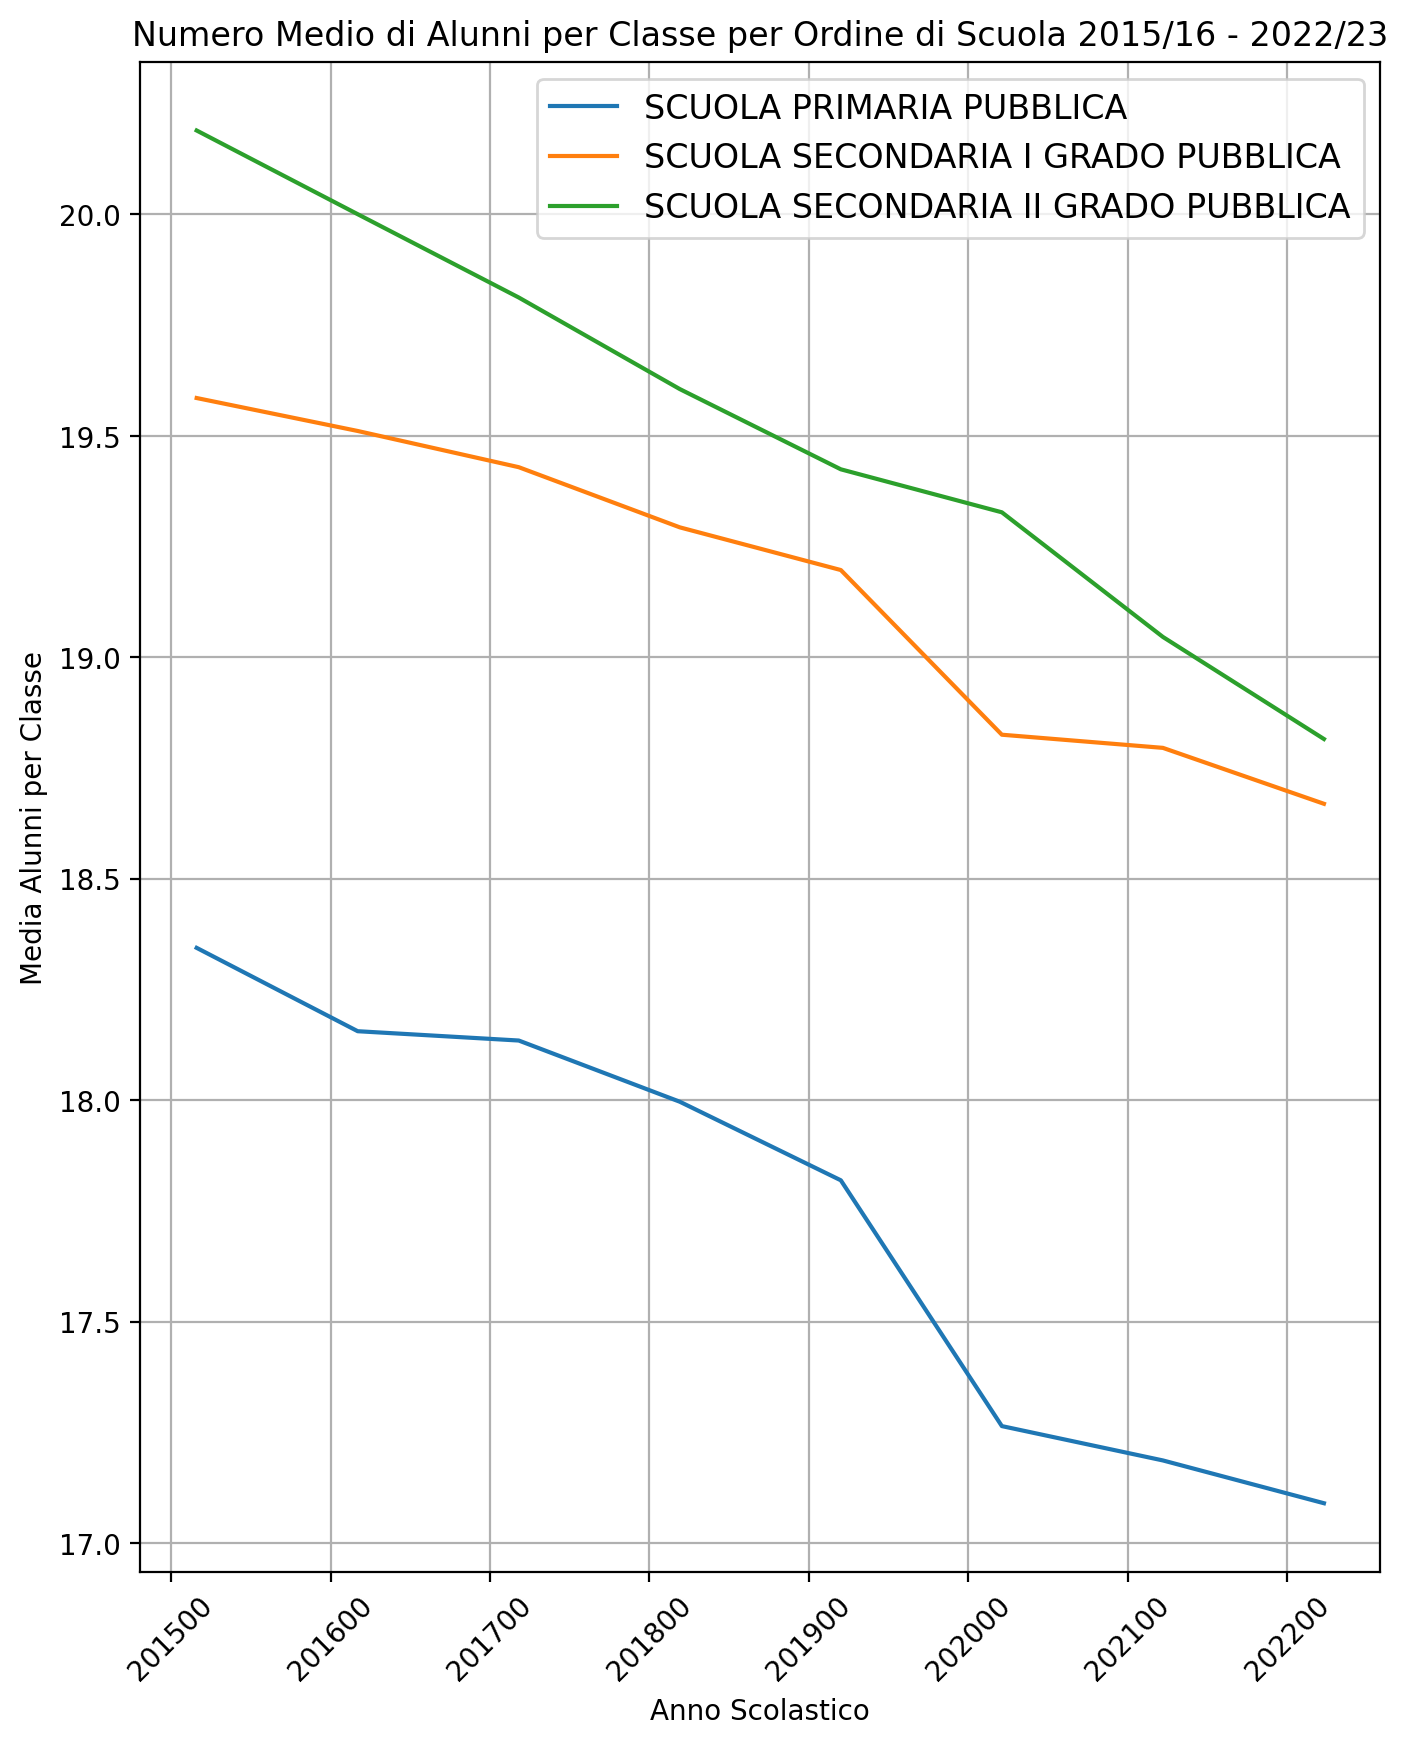

In [168]:
average_students_per_class = df.groupby(['ANNOSCOLASTICO', 'ORDINESCUOLA', 'PUBBLICA_PARITARIA']).apply(
    lambda x: (x['ALUNNITOT'] / x['CLASSI']).mean()
).reset_index(name='Media_Alunni_Per_Classe')

# Filtra i dati per le condizioni specificate e crea le serie per il grafico
conditions = [
    ("SCUOLA PRIMARIA", "PUBBLICA"),
    # ("SCUOLA PRIMARIA", "PARITARIA"),
    ("SCUOLA SECONDARIA I GRADO", "PUBBLICA"),
    # ("SCUOLA SECONDARIA I GRADO", "PARITARIA"),
    ("SCUOLA SECONDARIA II GRADO", "PUBBLICA"),
    # ("SCUOLA SECONDARIA II GRADO", "PARITARIA"),
]

# Imposta la figura per i subplots
fig, ax = plt.subplots(figsize=(8, 10))

# Per ogni condizione, filtra i dati e crea una serie nel grafico
for school_type, school_status in conditions:
    subset = average_students_per_class[
        (average_students_per_class['ORDINESCUOLA'] == school_type) & 
        (average_students_per_class['PUBBLICA_PARITARIA'] == school_status)
    ]
    ax.plot(subset['ANNOSCOLASTICO'], subset['Media_Alunni_Per_Classe'], label=f'{school_type} {school_status}')

# Imposta il titolo e le etichette
ax.set_title('Numero Medio di Alunni per Classe per Ordine di Scuola 2015/16 - 2022/23')
ax.set_xlabel('Anno Scolastico')
ax.set_ylabel('Media Alunni per Classe')
ax.legend()
ax.grid(True)

# Mostra il grafico
plt.xticks(rotation=45)
plt.show()

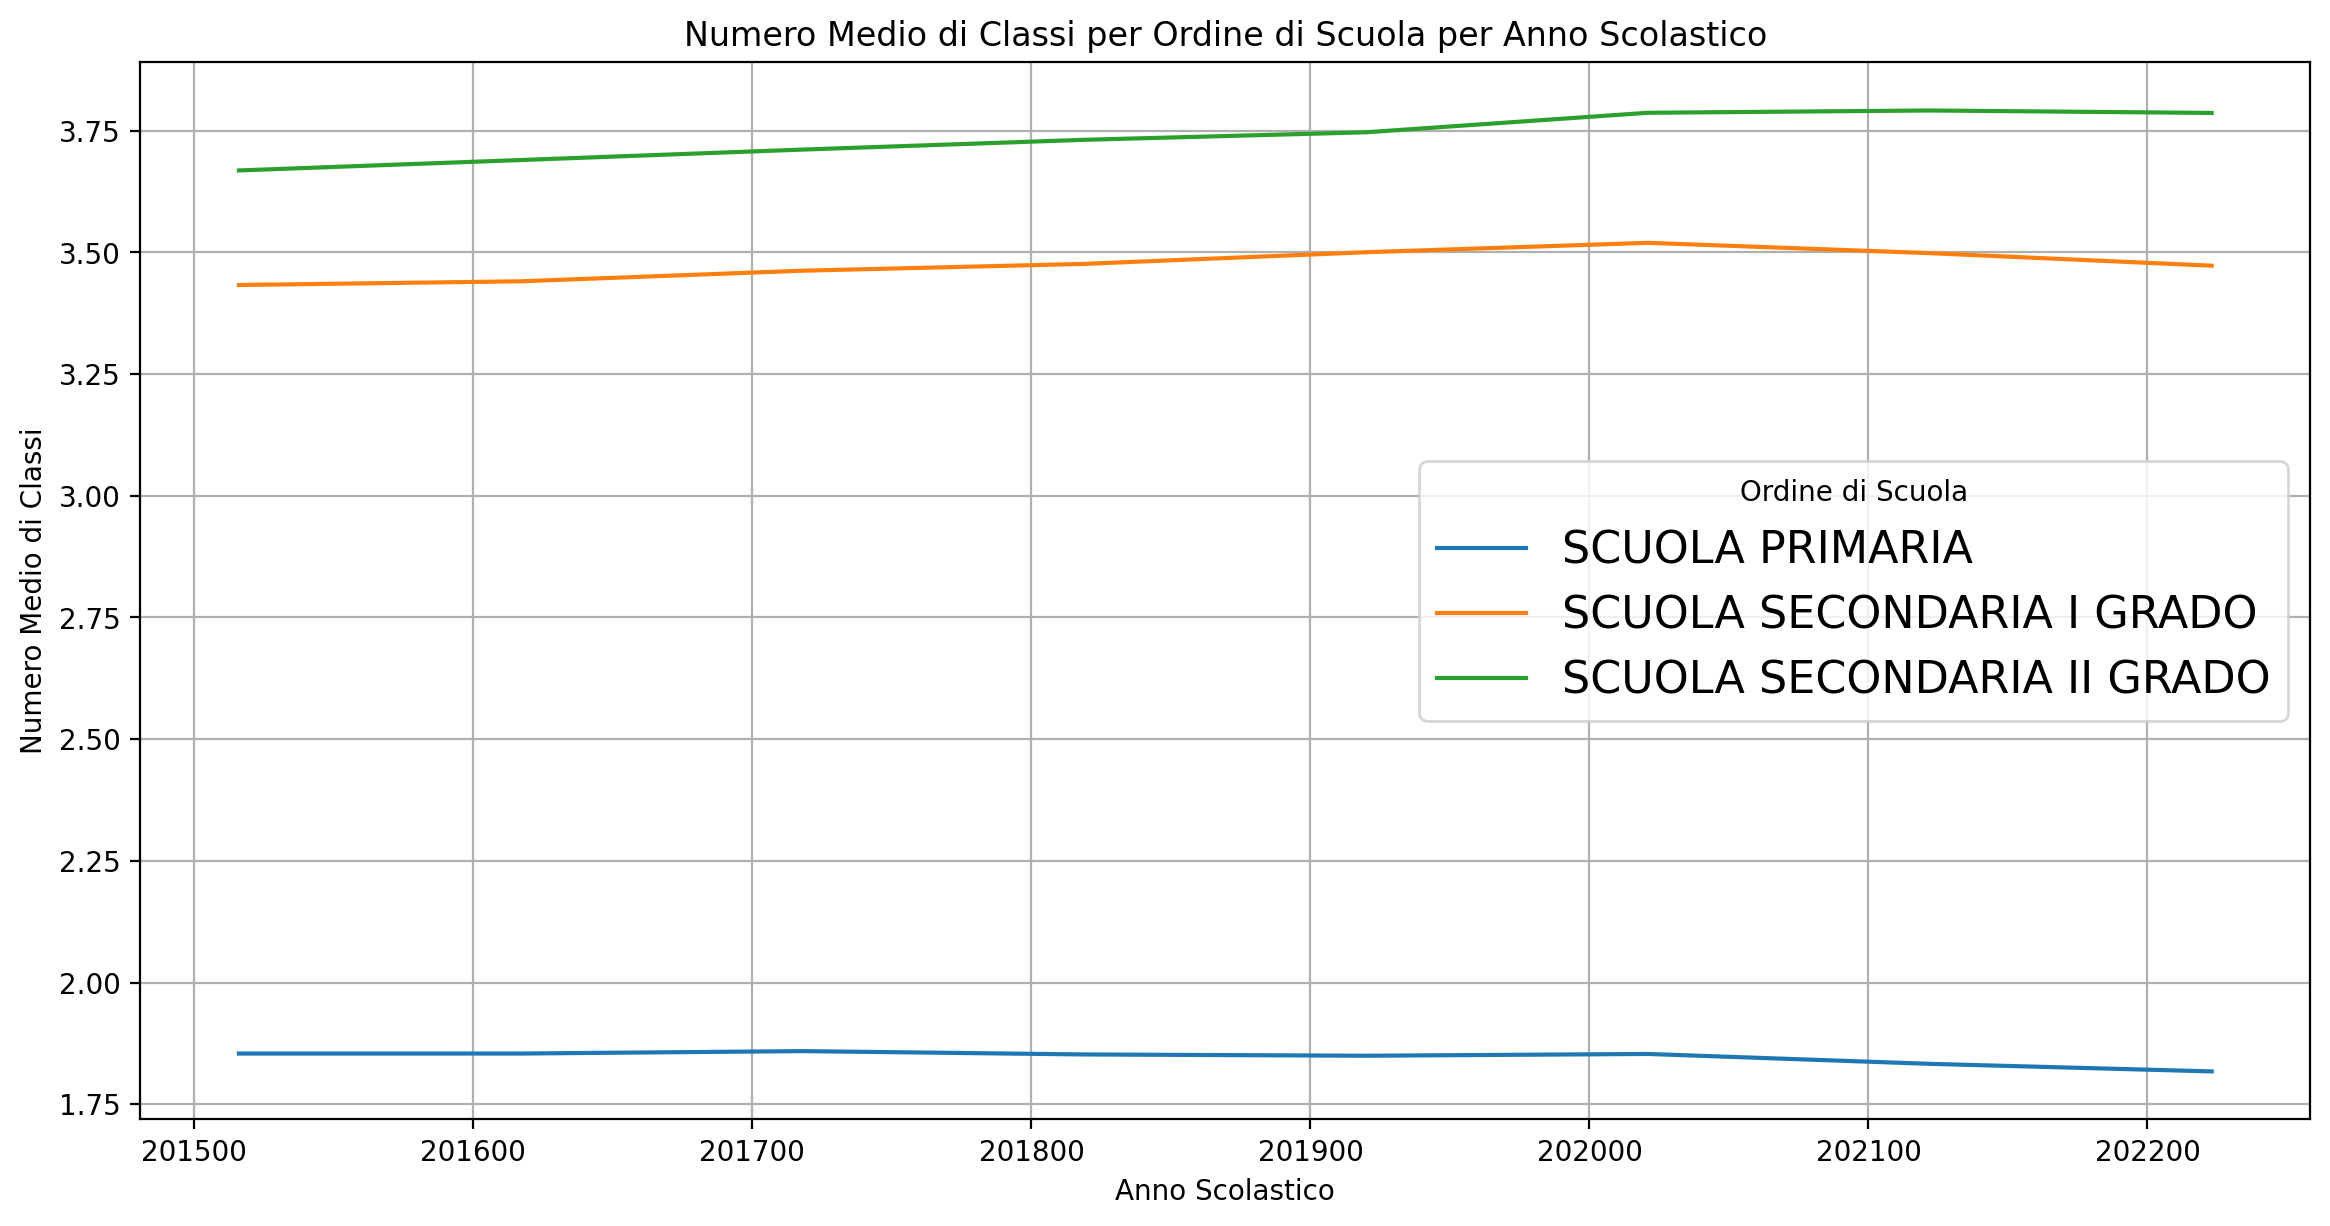

In [92]:
average_classes_by_school_type = df.groupby(['ANNOSCOLASTICO', 'ORDINESCUOLA'])['CLASSI'].mean().unstack()

# Visualizza i risultati in un grafico
average_classes_by_school_type.plot(kind='line', figsize=(14, 7))
plt.title('Numero Medio di Classi per Ordine di Scuola per Anno Scolastico')
plt.xlabel('Anno Scolastico')
plt.ylabel('Numero Medio di Classi')
plt.legend(title='Ordine di Scuola')
plt.grid(True)
plt.show()

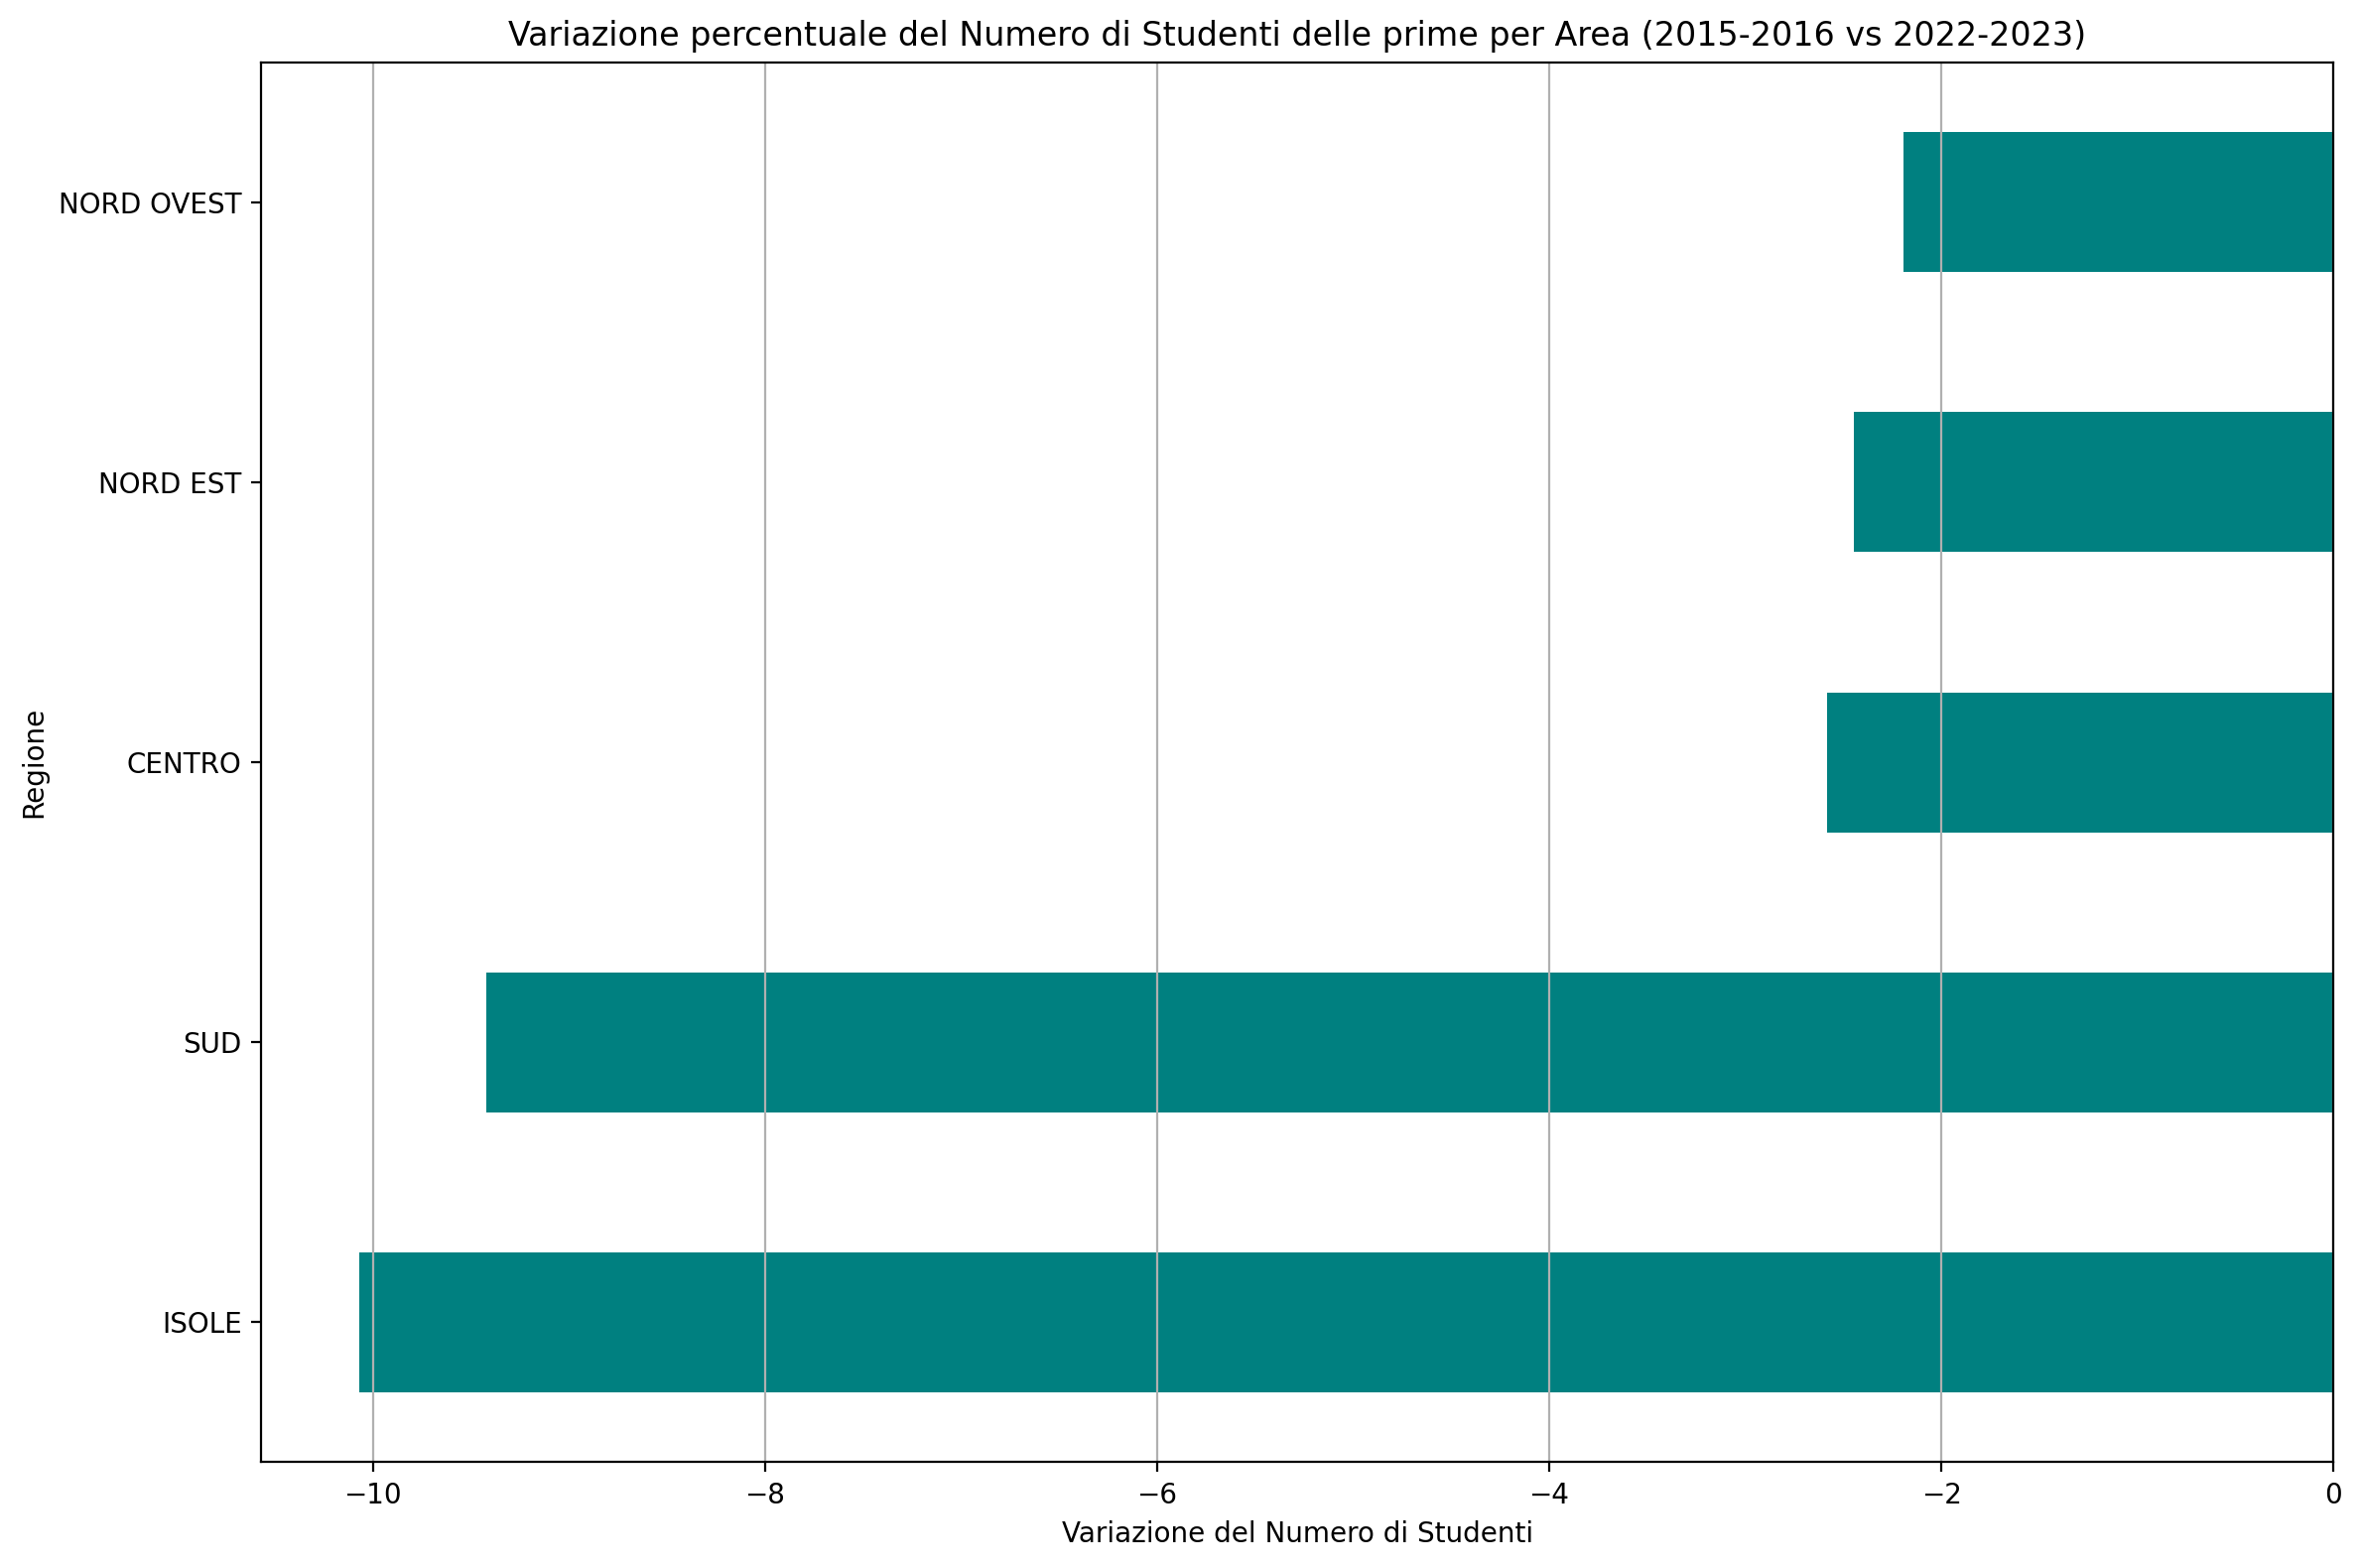

In [171]:
students_by_region_2015 = df[
    (df['ANNOSCOLASTICO'] == 201516)
    
].groupby('AREAGEOGRAFICA')['ALUNNITOT'].sum()

students_by_region_2023 = df[
    (df['ANNOSCOLASTICO'] == 202223) 
].groupby('AREAGEOGRAFICA')['ALUNNITOT'].sum()

# Calculating the absolute change in student numbers for each region
change_in_students_by_region = (students_by_region_2023 - students_by_region_2015)/students_by_region_2015*100

# Sort the results for better visualization
sorted_change_in_students_by_region = change_in_students_by_region.sort_values()

# Create a bar plot for the change in student numbers for each region
plt.figure(figsize=(12, 8))
sorted_change_in_students_by_region.plot(kind='barh', color='teal')

plt.title('Variazione percentuale del Numero di Studenti delle prime per Area (2015-2016 vs 2022-2023)')
plt.xlabel('Variazione del Numero di Studenti')
plt.ylabel('Regione')
plt.grid(axis='x')

# Show the plot
plt.tight_layout()
plt.show()

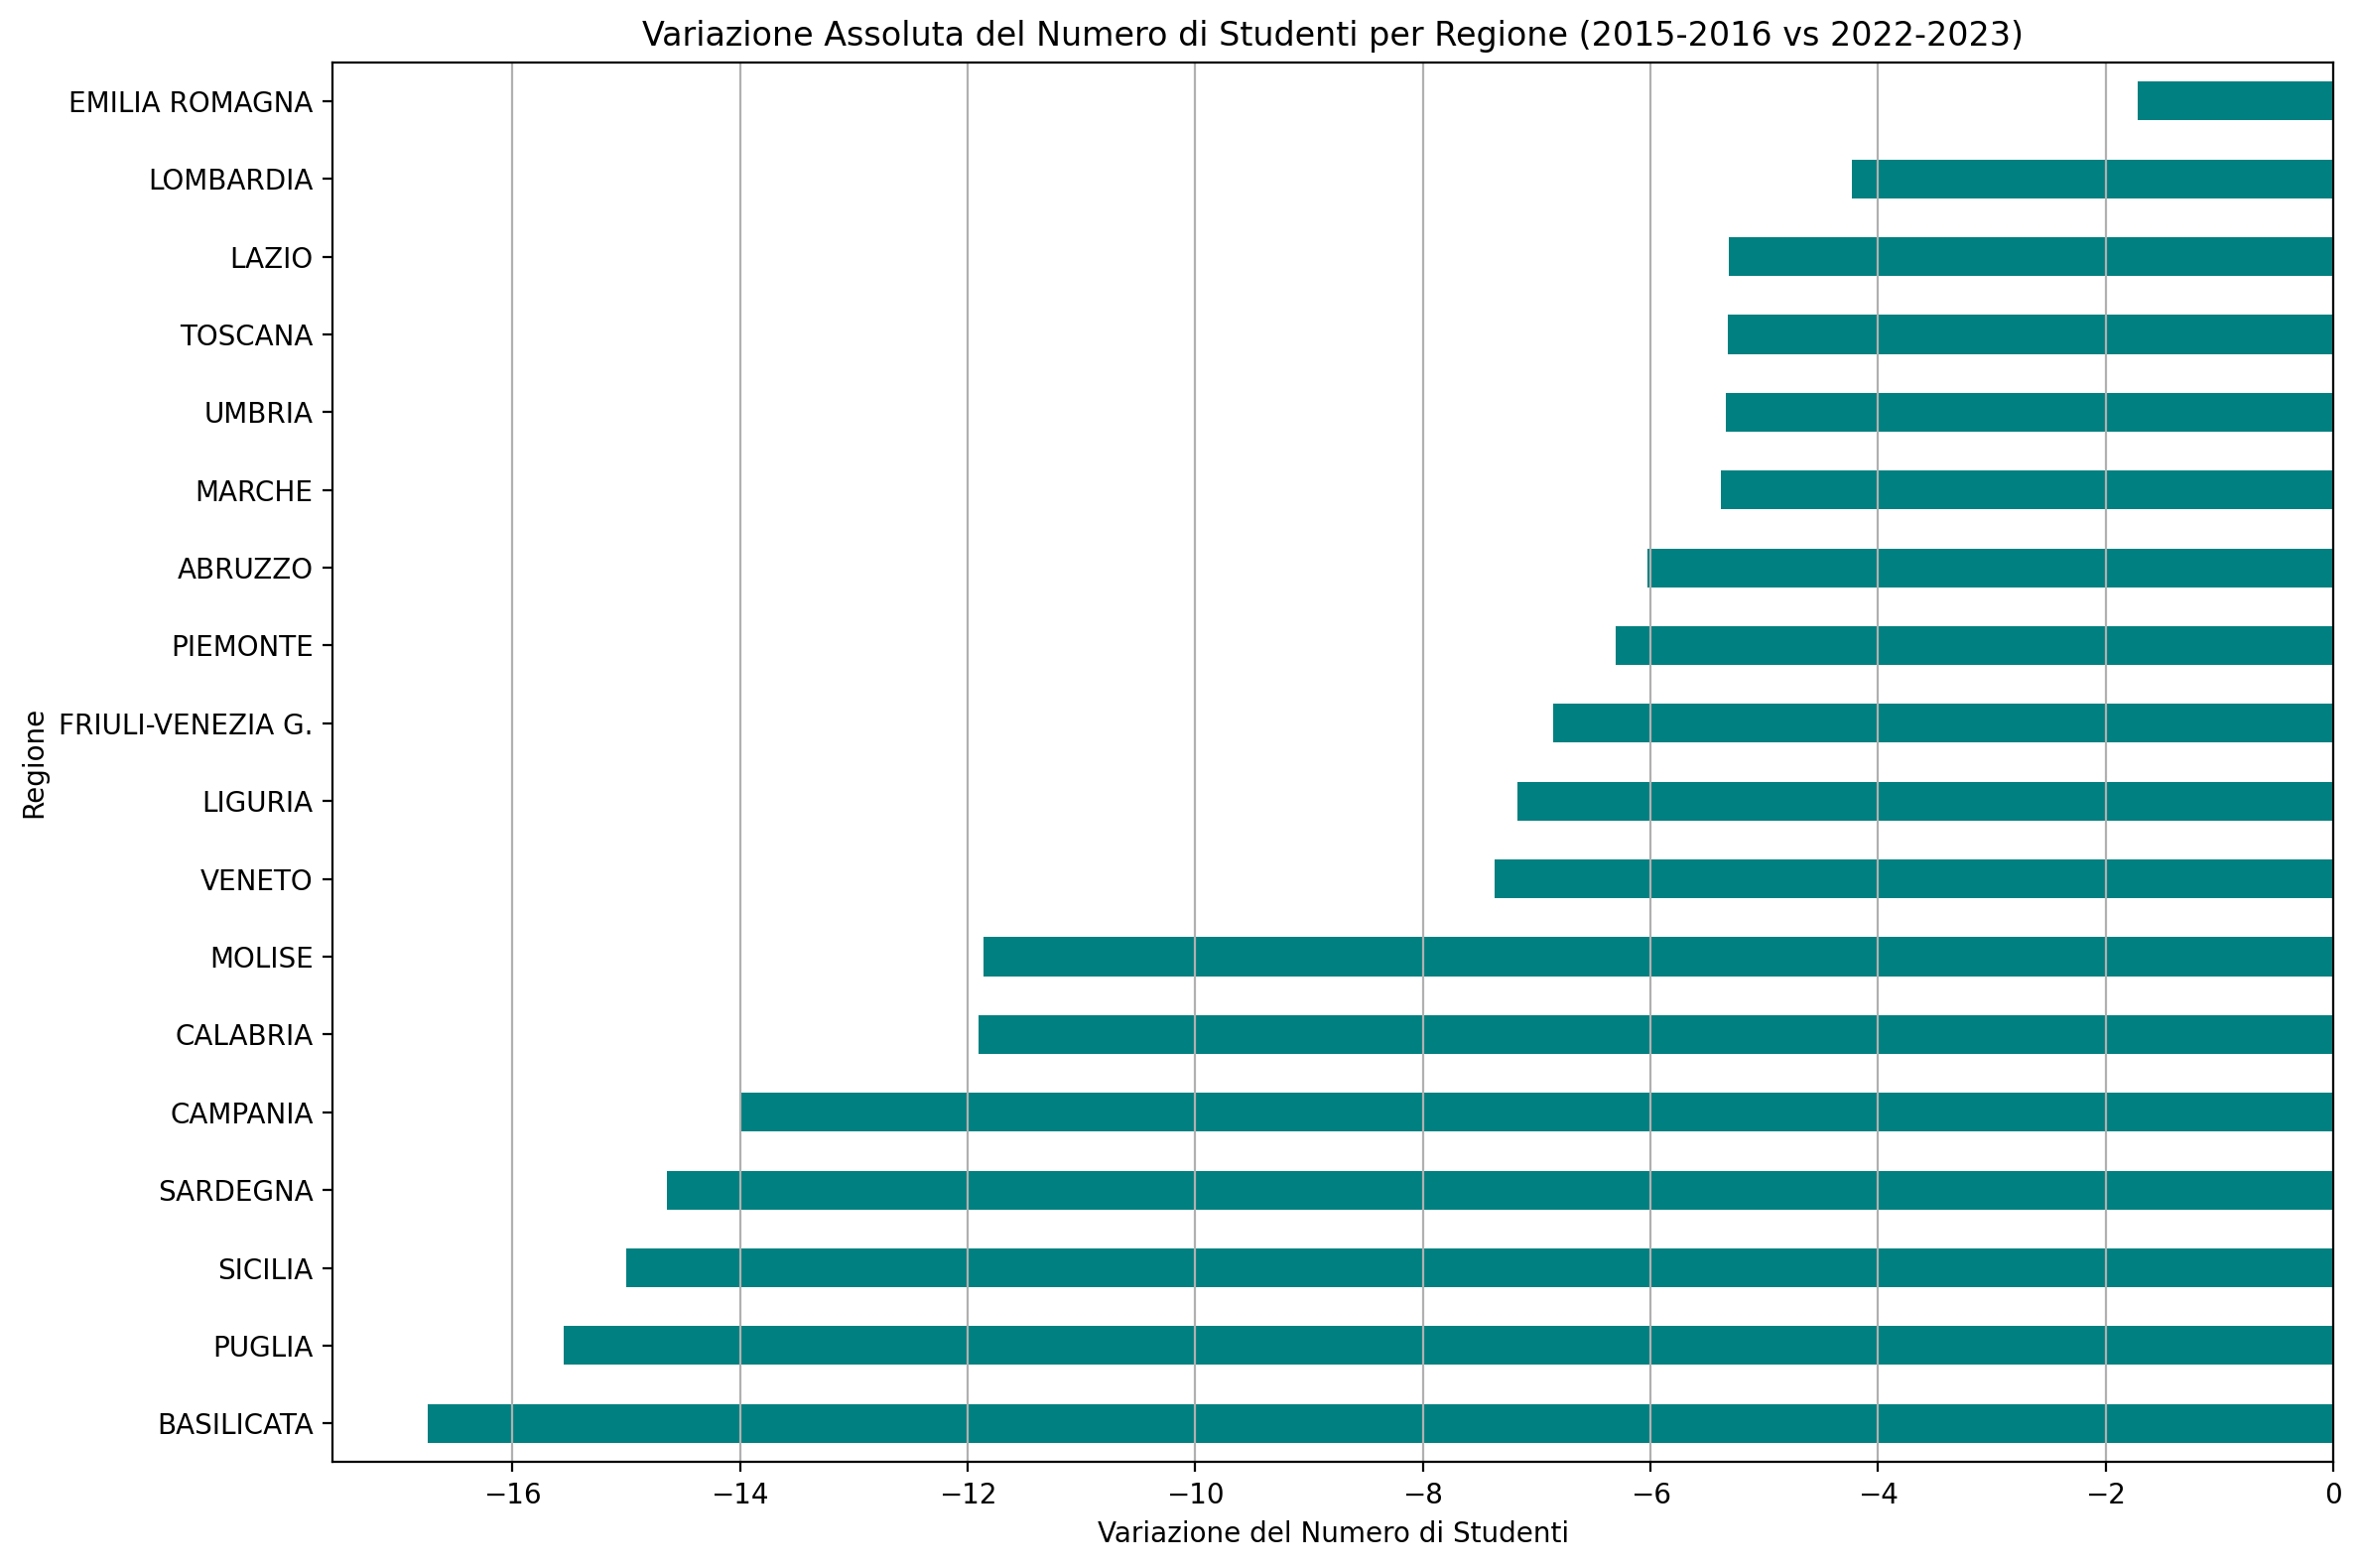

In [295]:
students_by_region_2015 = df[
    (df['ANNOSCOLASTICO'] == 201516)
    & (df['ANNOCORSOCLASSE'] == 1)
].groupby('REGIONE')['ALUNNITOT'].sum()
students_by_region_2023 = df[
    (df['ANNOSCOLASTICO'] == 202223)
    & (df['ANNOCORSOCLASSE'] == 1)
].groupby('REGIONE')['ALUNNITOT'].sum()

# Calculating the absolute change in student numbers for each region
change_in_students_by_region = (students_by_region_2023 - students_by_region_2015)*100/students_by_region_2015

# Sort the results for better visualization
sorted_change_in_students_by_region = change_in_students_by_region.sort_values()

# Create a bar plot for the change in student numbers for each region
plt.figure(figsize=(12, 8))
sorted_change_in_students_by_region.plot(kind='barh', color='teal')

plt.title('Variazione Assoluta del Numero di Studenti per Regione (2015-2016 vs 2022-2023)')
plt.xlabel('Variazione del Numero di Studenti')
plt.ylabel('Regione')
plt.grid(axis='x')

# Show the plot
plt.tight_layout()
plt.show()

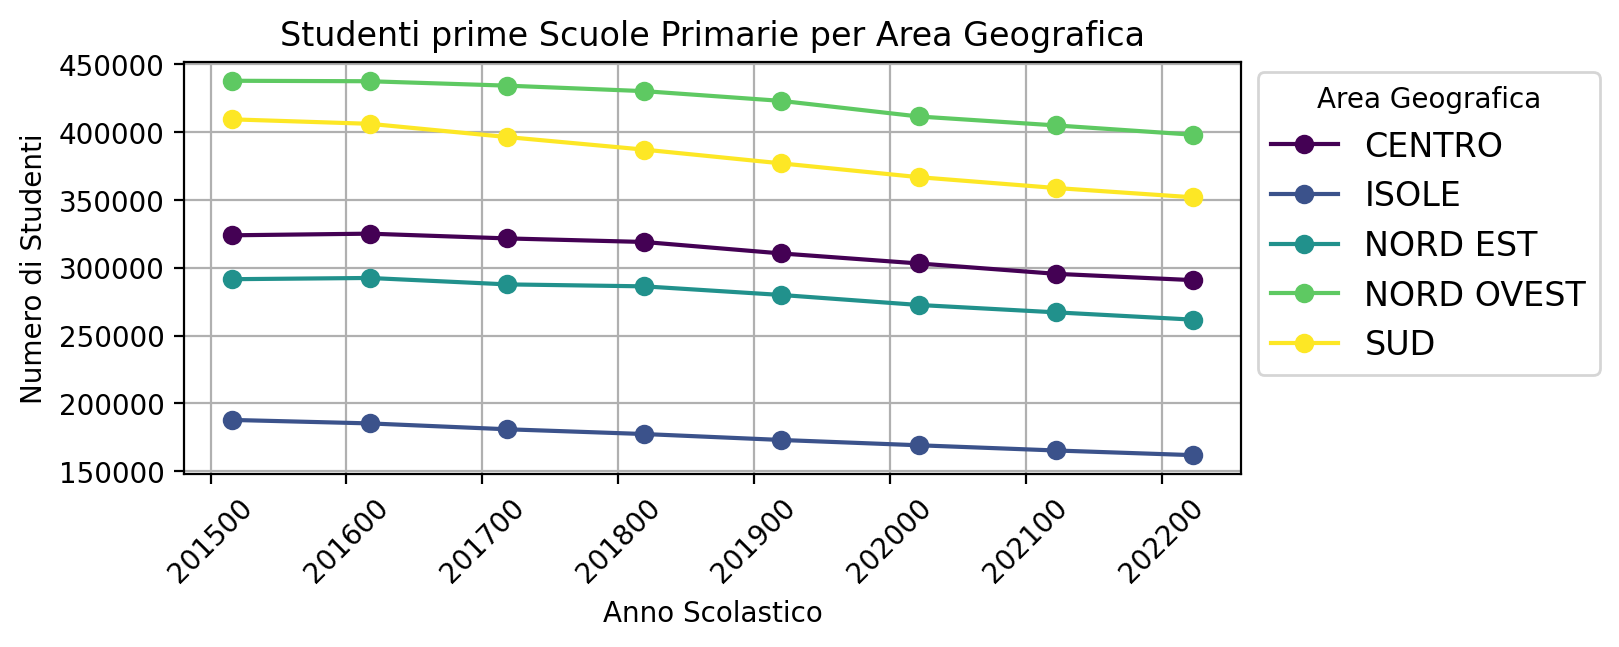

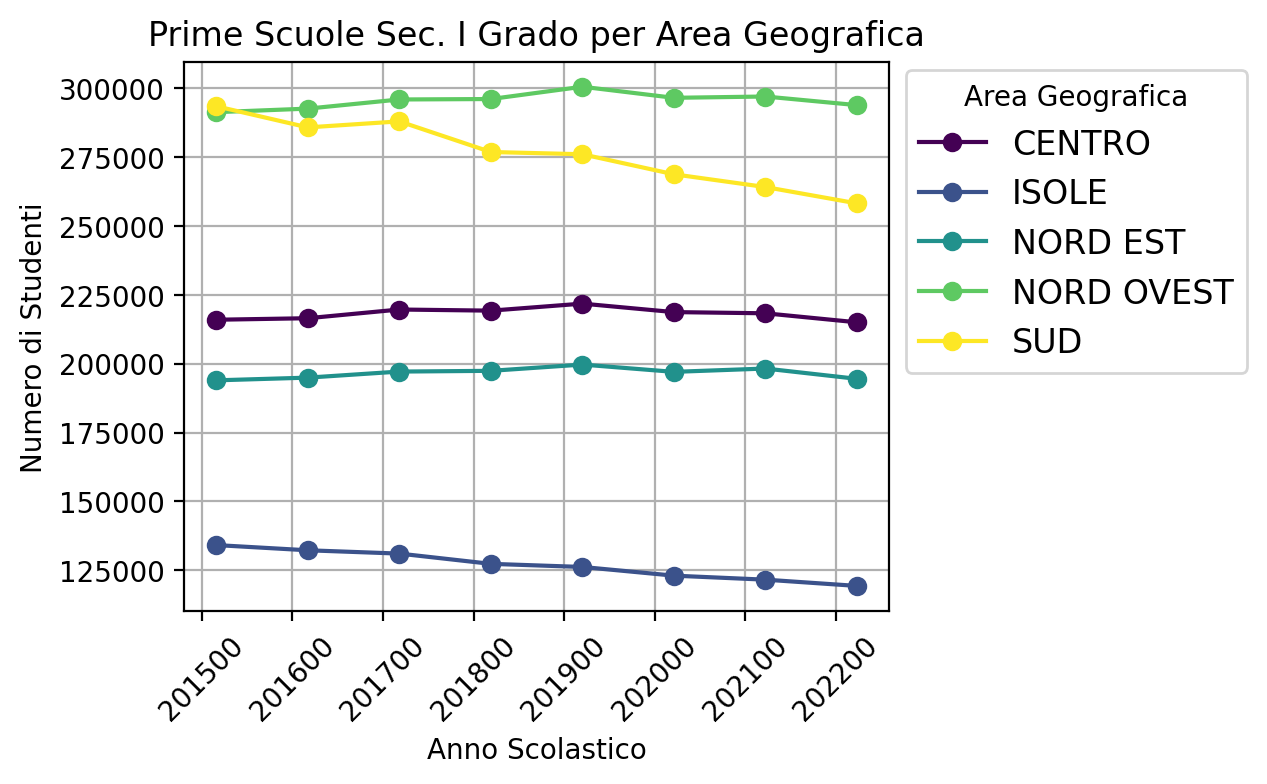

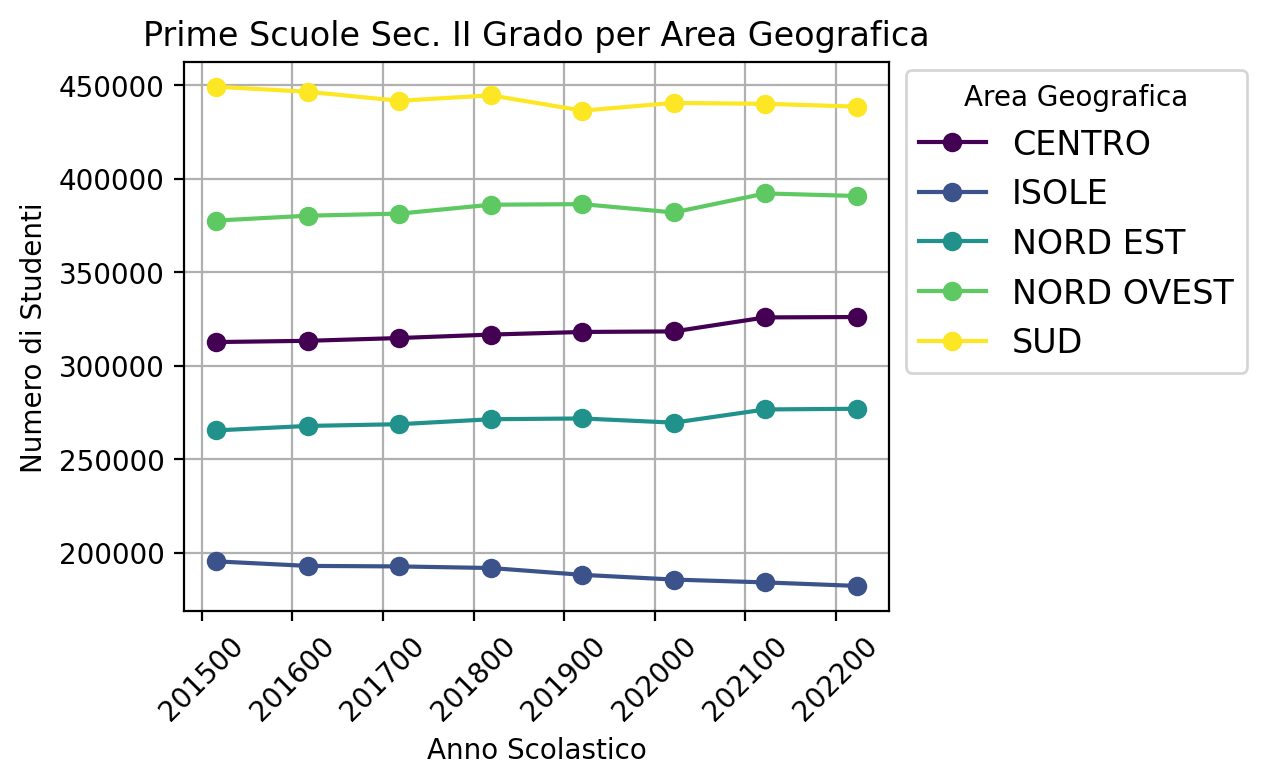

In [289]:
# Filtrare i dati per includere solo le scuole primarie
primary_schools_data = df[
    (df['ORDINESCUOLA'] == 'SCUOLA PRIMARIA') & 
    df['ANNOCORSOCLASSE'] == 1
]

# Raggruppare i dati per anno scolastico e area geografica, e sommare il numero totale di studenti
primary_students_by_year_area = primary_schools_data.groupby(['ANNOSCOLASTICO', 'AREAGEOGRAFICA'])['ALUNNITOT'].sum().unstack()

# Filtrare i dati per includere solo le scuole secondarie di primo grado
secondary_1_schools_data = df[
    (df['ORDINESCUOLA'] == 'SCUOLA SECONDARIA I GRADO') & 
    df['ANNOCORSOCLASSE'] == 1
]

# Raggruppare i dati per anno scolastico e area geografica, e sommare il numero totale di studenti
secondary_1_students_by_year_area = secondary_1_schools_data.groupby(['ANNOSCOLASTICO', 'AREAGEOGRAFICA'])['ALUNNITOT'].sum().unstack()

# Filtrare i dati per includere solo le scuole secondarie di secondo grado
secondary_2_schools_data = df[
    (df['ORDINESCUOLA'] == 'SCUOLA SECONDARIA II GRADO') & 
    df['ANNOCORSOCLASSE'] == 1
]

# Raggruppare i dati per anno scolastico e area geografica, e sommare il numero totale di studenti
secondary_2_students_by_year_area = secondary_2_schools_data.groupby(['ANNOSCOLASTICO', 'AREAGEOGRAFICA'])['ALUNNITOT'].sum().unstack()

# Creare grafici lineari per entrambi i livelli di istruzione
plt.figure(figsize=(15, 6))
plt.rc('legend',fontsize=12)

# Grafico per le scuole primarie
plt.subplot(2, 2, 1)
primary_students_by_year_area.plot(kind='line', marker='o', ax=plt.gca(), cmap="viridis")
plt.title('Studenti prime Scuole Primarie per Area Geografica')
plt.xlabel('Anno Scolastico')
plt.ylabel('Numero di Studenti')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Area Geografica', bbox_to_anchor=(1, 1.016), loc='upper left')

# Mostrare i grafici
plt.show()


# Grafico per le scuole secondarie di primo grado
plt.subplot(2, 2, 1)
secondary_1_students_by_year_area.plot(kind='line', marker='o', ax=plt.gca(), cmap="viridis")
plt.title('Prime Scuole Sec. I Grado per Area Geografica')
plt.xlabel('Anno Scolastico')
plt.ylabel('Numero di Studenti')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Area Geografica', bbox_to_anchor=(1, 1.016), loc='upper left')

# Mostrare i grafici
plt.show()


# Grafico per le scuole secondarie di secondo grado
plt.subplot(2, 2, 1)
secondary_2_students_by_year_area.plot(kind='line', marker='o', ax=plt.gca(), cmap="viridis")
plt.title('Prime Scuole Sec. II Grado per Area Geografica')
plt.xlabel('Anno Scolastico')
plt.ylabel('Numero di Studenti')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Area Geografica', bbox_to_anchor=(1, 1.016), loc='upper left')

plt.show()


In [290]:

print(len(df[
    df['ANNOSCOLASTICO'] == 201516
]['CODICEISTITUTORIFERIMENTO'].unique()))

print(len(df[
    df['ANNOSCOLASTICO'] == 202223
]['CODICEISTITUTORIFERIMENTO'].unique()))

8569
8211


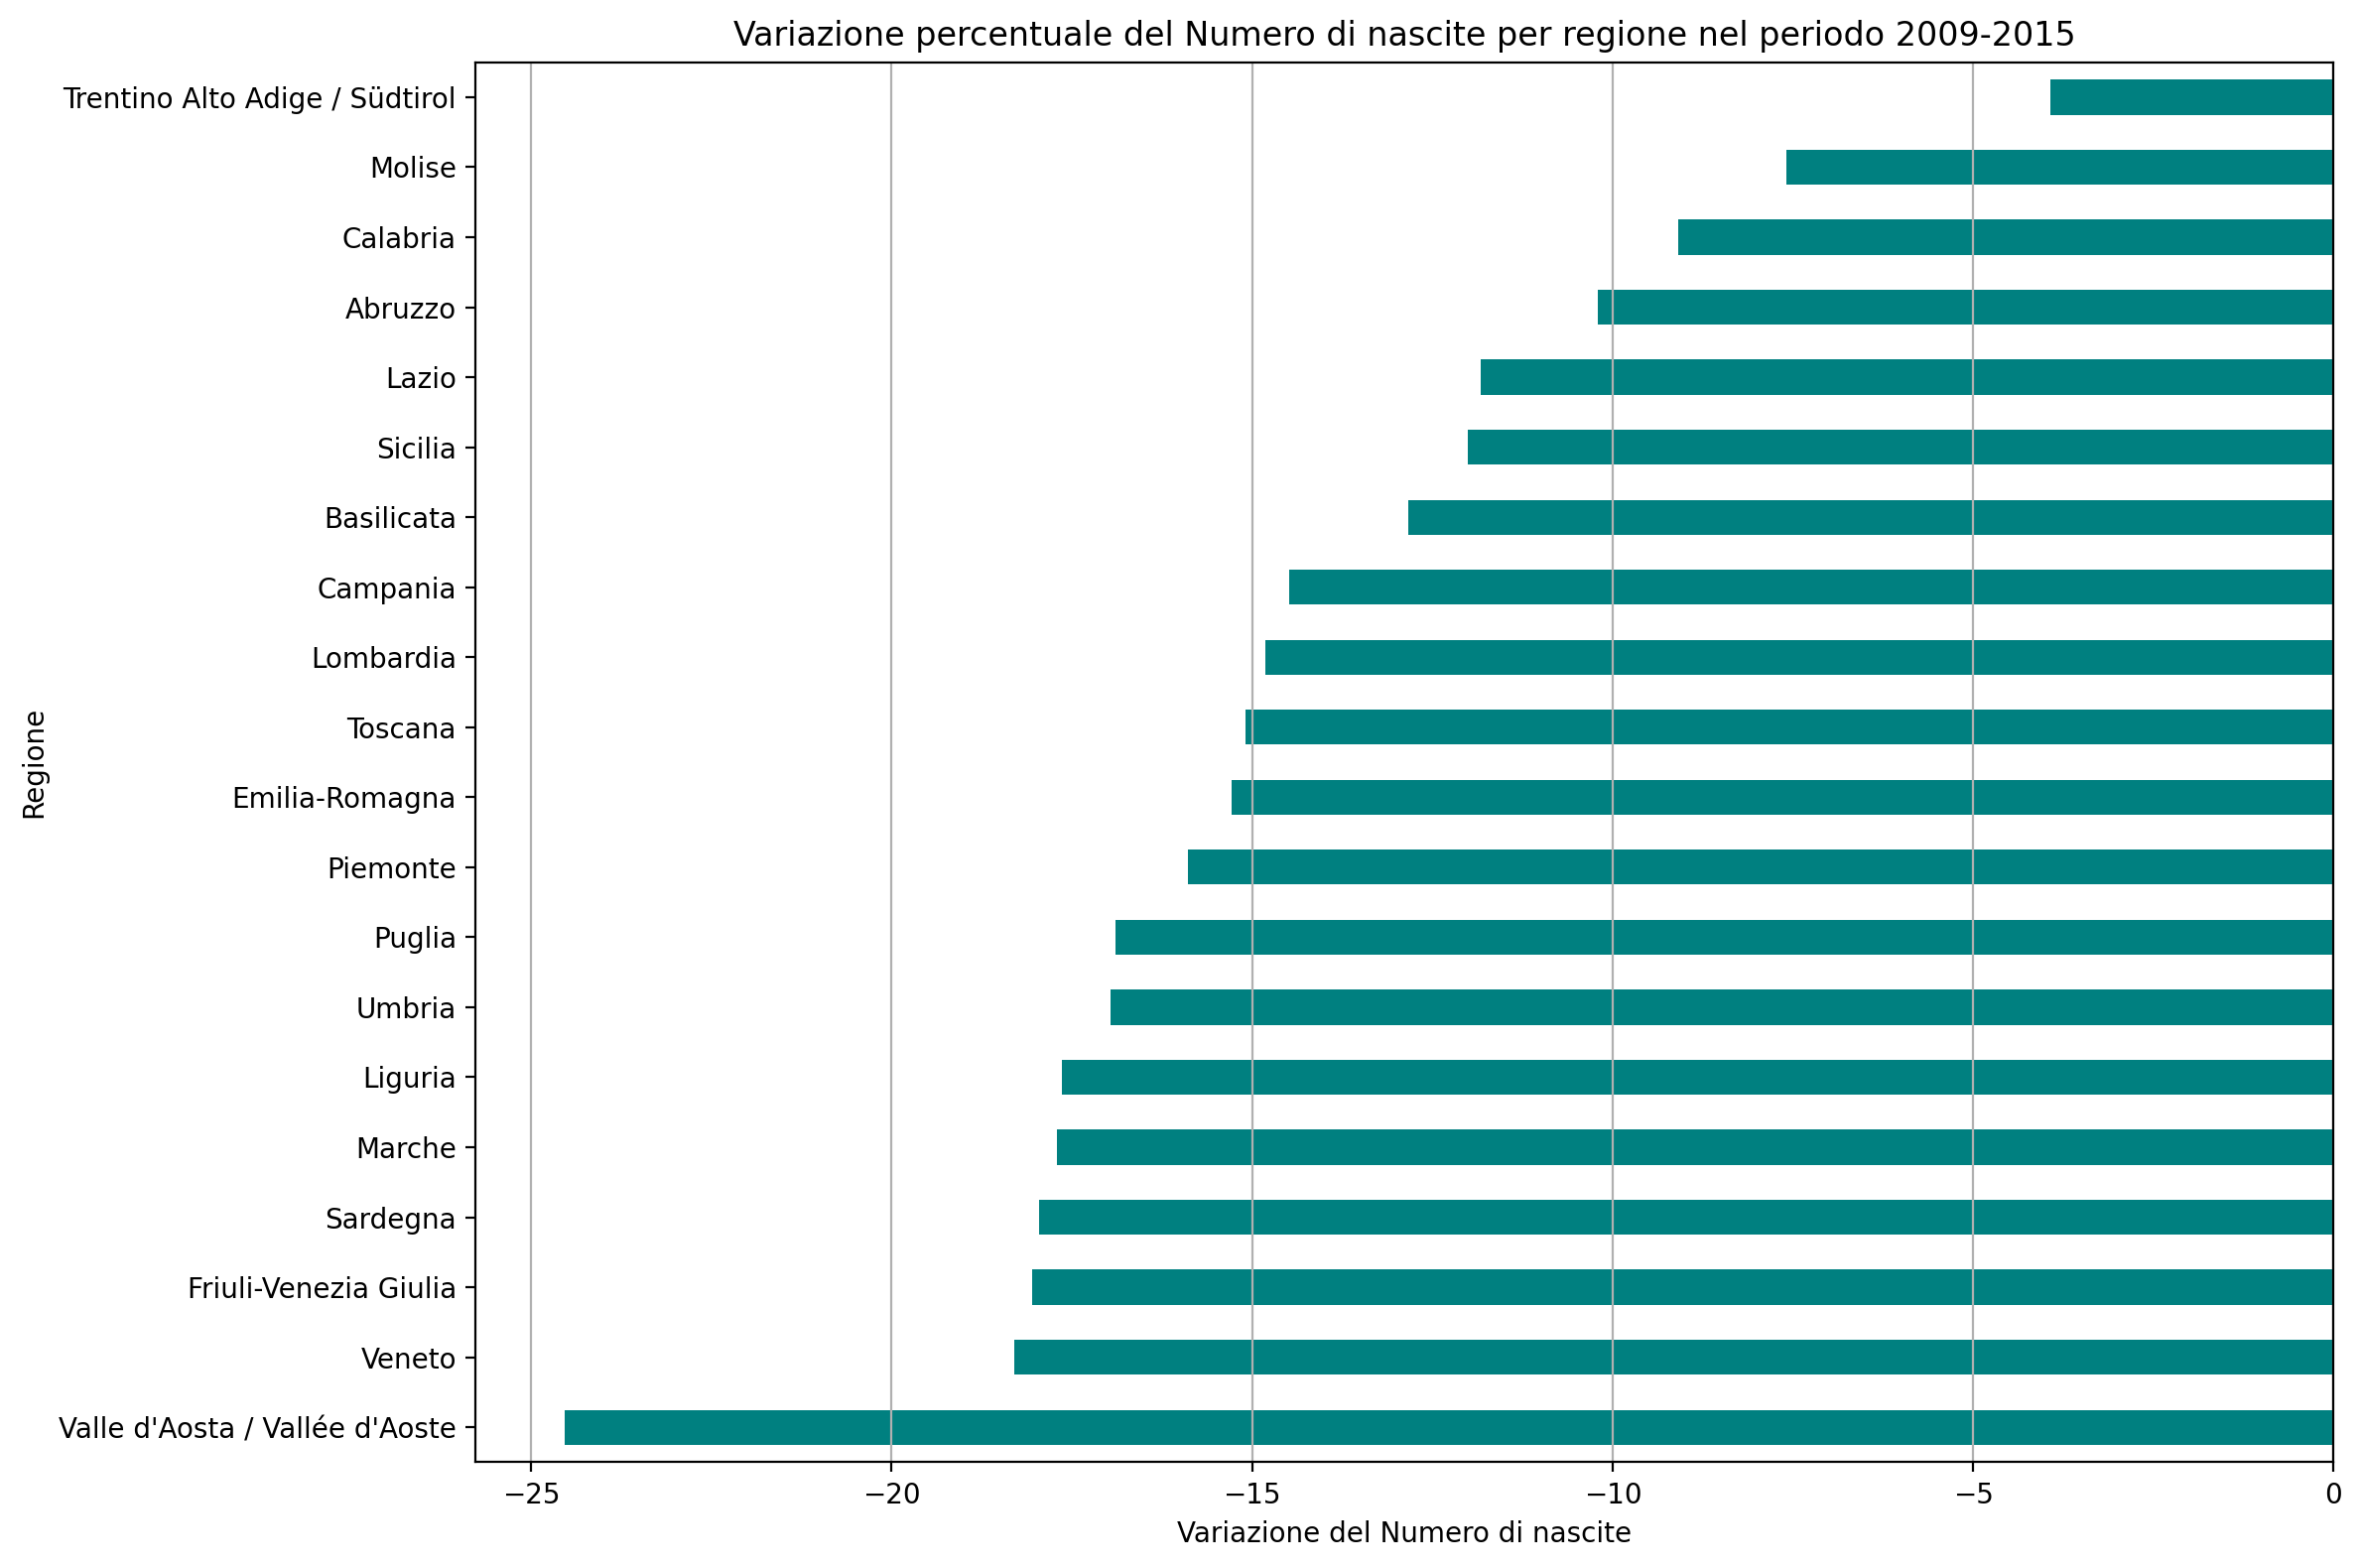

In [203]:
regions = [
    'Abruzzo',
    'Basilicata',
    'Calabria',
    'Campania',
    'Emilia-Romagna',
    'Friuli-Venezia Giulia',
    'Lazio',
    'Liguria',
    'Lombardia',
    'Marche',
    'Molise',
    'Piemonte',
    'Puglia',
    'Sardegna',
    'Sicilia',
    'Toscana',
    'Trentino Alto Adige / Südtirol',
    'Umbria',
    'Valle d\'Aosta / Vallée d\'Aoste',
    'Veneto'
]

births_2009 = df_births[
    (df_births['TIME'] == 2009) &
    (df_births['Territorio'].isin(regions))
].groupby('Territorio')['Value'].sum()

births_2015 = df_births[
    (df_births['TIME'] == 2015) &
    (df_births['Territorio'].isin(regions))
].groupby('Territorio')['Value'].sum()

change_in_births_by_region = (births_2015 - births_2009)/births_2009*100

# Sort the results for better visualization
changes_in_births = change_in_births_by_region.sort_values()

# Create a bar plot for the change in student numbers for each region
plt.figure(figsize=(12, 8))
changes_in_births.plot(kind='barh', color='teal')

plt.title('Variazione percentuale del Numero di nascite per regione nel periodo 2009-2015')
plt.xlabel('Variazione del Numero di nascite')
plt.ylabel('Regione')
plt.grid(axis='x')

# Show the plot
plt.tight_layout()
plt.show()

In [199]:
df_births['Territorio'].unique()

array(['Italia', 'Nord-ovest', 'Piemonte', 'Monza e della Brianza',
       'Fermo', 'Barletta-Andria-Trani', 'Sud Sardegna', 'Torino',
       'Verbano-Cusio-Ossola', 'Biella', 'Cuneo', 'Vercelli', 'Novara',
       'Alessandria', 'Liguria', 'Savona',
       "Valle d'Aosta / Vallée d'Aoste", 'Imperia', 'Asti', 'Varese',
       'Genova', 'La Spezia', 'Como', 'Lombardia', 'Lecco', 'Sondrio',
       'Brescia', 'Bergamo', 'Milano', 'Pavia', 'Lodi', 'Cremona',
       'Nord-est', 'Bolzano / Bozen', 'Provincia Autonoma Trento', 'Nord',
       'Mantova', 'Provincia Autonoma Bolzano / Bozen', 'Trento',
       'Vicenza', 'Venezia', 'Veneto', 'Belluno', 'Treviso', 'Verona',
       'Friuli-Venezia Giulia', 'Gorizia', 'Rovigo', 'Udine', 'Padova',
       'Pordenone', 'Piacenza', 'Modena', 'Trieste', 'Parma', 'Bologna',
       "Reggio nell'Emilia", 'Emilia-Romagna', 'Ferrara', 'Rimini',
       'Ravenna', 'Centro', 'Trentino Alto Adige / Südtirol',
       'Forlì-Cesena', 'Toscana', 'Pistoia', 'Livorno',

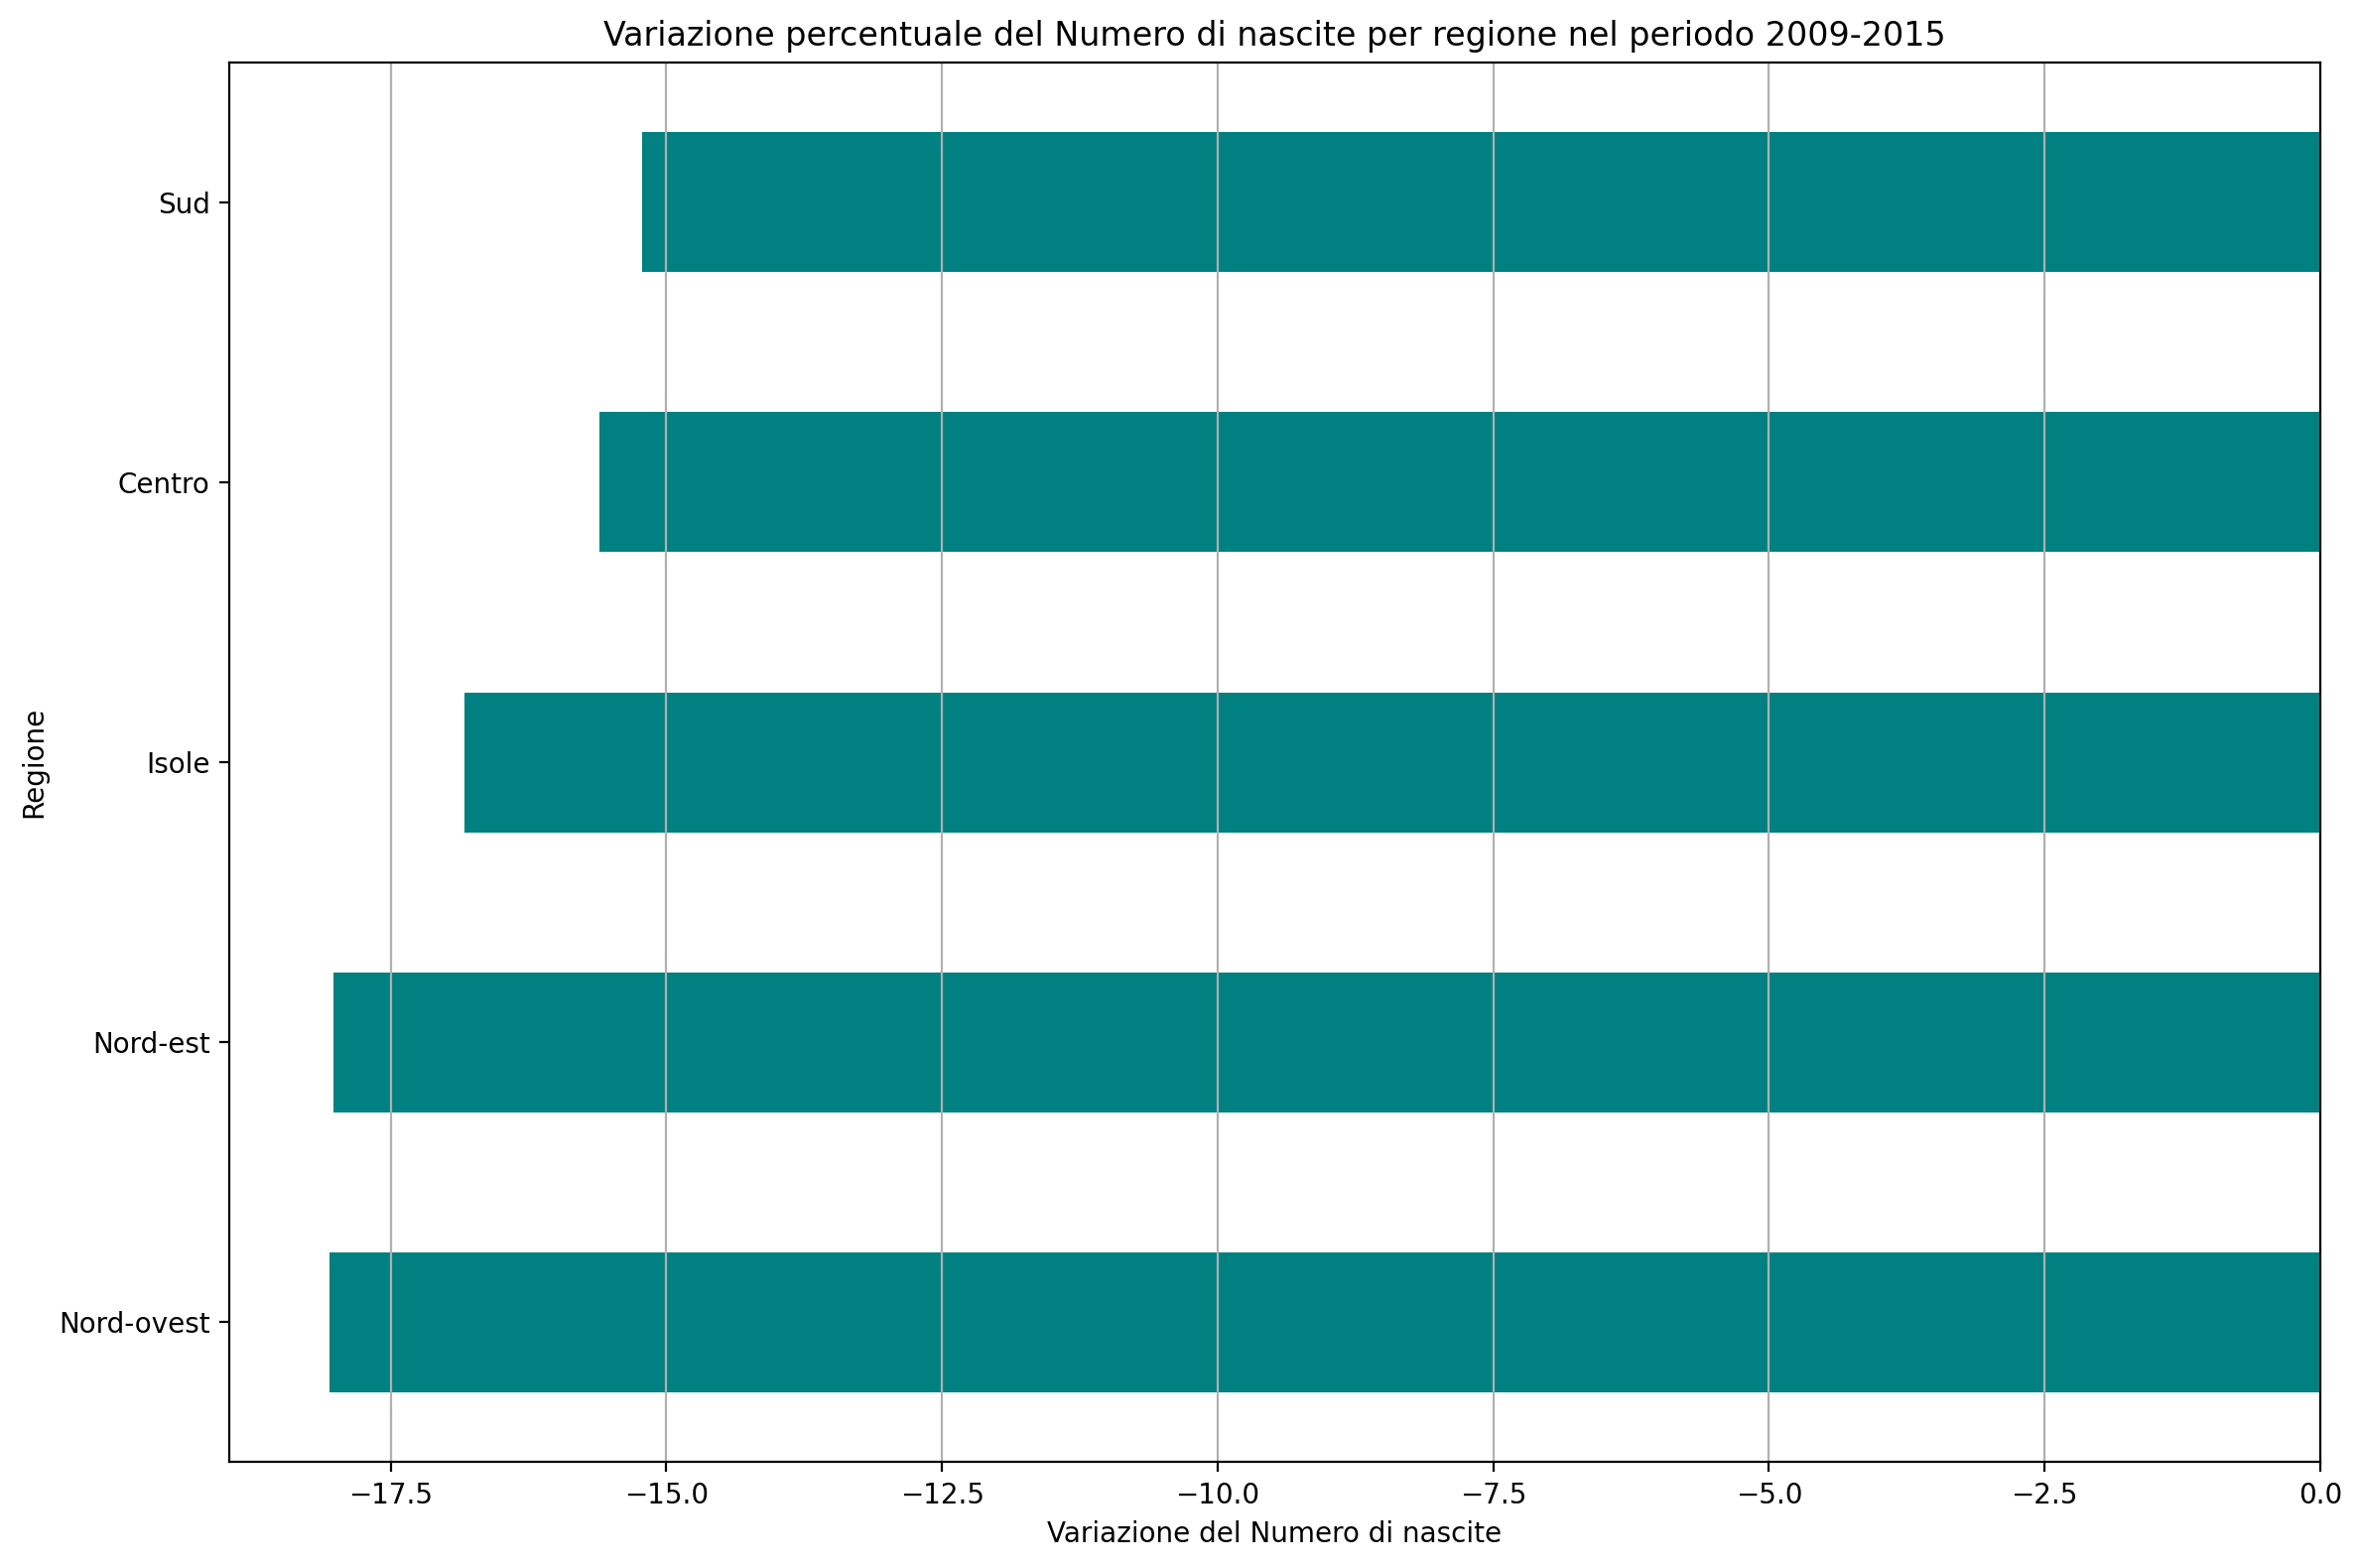

In [267]:
regions = [
    'Abruzzo',
    'Basilicata',
    'Calabria',
    'Campania',
    'Emilia-Romagna',
    'Friuli-Venezia Giulia',
    'Lazio',
    'Liguria',
    'Lombardia',
    'Marche',
    'Molise',
    'Piemonte',
    'Puglia',
    'Sardegna',
    'Sicilia',
    'Toscana',
    'Trentino Alto Adige / Südtirol',
    'Umbria',
    'Valle d\'Aosta / Vallée d\'Aoste',
    'Veneto'
]

births_2009 = df_births[
    (df_births['TIME'] == 2009) &
    (df_births['Territorio'].isin(['Nord-ovest', 'Nord-est', 'Centro', 'Sud', 'Isole']))
].groupby('Territorio')['Value'].sum()

births_2016 = df_births[
    (df_births['TIME'] == 2016) &
    (df_births['Territorio'].isin(['Nord-ovest', 'Nord-est', 'Centro', 'Sud', 'Isole']))
].groupby('Territorio')['Value'].sum()

change_in_births_by_region = (births_2016 - births_2009)/births_2009*100

# Sort the results for better visualization
changes_in_births = change_in_births_by_region.sort_values()

# Create a bar plot for the change in student numbers for each region
plt.figure(figsize=(12, 8))
changes_in_births.plot(kind='barh', color='teal')

plt.title('Variazione percentuale del Numero di nascite per regione nel periodo 2009-2015')
plt.xlabel('Variazione del Numero di nascite')
plt.ylabel('Regione')
plt.grid(axis='x')

# Show the plot
plt.tight_layout()
plt.show()

In [275]:
# df = pd.DataFrame([['g1', 'c1', 10], ['g1', 'c2', 12], ['g1', 'c3', 13], ['g2', 'c1', 8], ['g2', 'c2', 10], ['g2', 'c3', 12]], columns=['group', 'column', 'val'])

# plot with seaborn barplot
# sns.barplot(data=df, x='column', y='val', hue='group')

change_in_births_by_region.sort_values()

Territorio
Nord-ovest   -18.059148
Nord-est     -18.015656
Isole        -16.830610
Centro       -15.608722
Sud          -15.217861
Name: Value, dtype: float64

In [276]:
students_by_region_2015 = df[
    (df['ANNOSCOLASTICO'] == 201516)
].groupby('AREAGEOGRAFICA')['ALUNNITOT'].sum()

students_by_region_2023 = df[
    (df['ANNOSCOLASTICO'] == 202223)
].groupby('AREAGEOGRAFICA')['ALUNNITOT'].sum()



In [277]:
students_by_region = (students_by_region_2023 - students_by_region_2015)*100/students_by_region_2015
students_by_region

AREAGEOGRAFICA
CENTRO        -2.580024
ISOLE        -10.066259
NORD EST      -2.443753
NORD OVEST    -2.190673
SUD           -9.420624
Name: ALUNNITOT, dtype: float64

In [278]:



births_students = pd.DataFrame({
    "Territorio": [j for i in [change_in_births_by_region.index.values, change_in_births_by_region.index.values] for j in i],
    "Dati": [j for i in [change_in_births_by_region.values, students_by_region.values] for j in i]
})


births_students["Tipo"] = "Natalità 2009/2016"
births_students.loc[5:, "Tipo"] = "Iscrizioni"

births_students

,Territorio,Dati,Tipo
0,Centro,-15.608722,Natalità 2009/2016
1,Isole,-16.830610,Natalità 2009/2016
2,Nord-est,-18.015656,Natalità 2009/2016
3,Nord-ovest,-18.059148,Natalità 2009/2016
4,Sud,-15.217861,Natalità 2009/2016
5,Centro,-2.580024,Iscrizioni
6,Isole,-10.066259,Iscrizioni
7,Nord-est,-2.443753,Iscrizioni
8,Nord-ovest,-2.190673,Iscrizioni
9,Sud,-9.420624,Iscrizioni


<AxesSubplot:xlabel='Dati', ylabel='Territorio'>

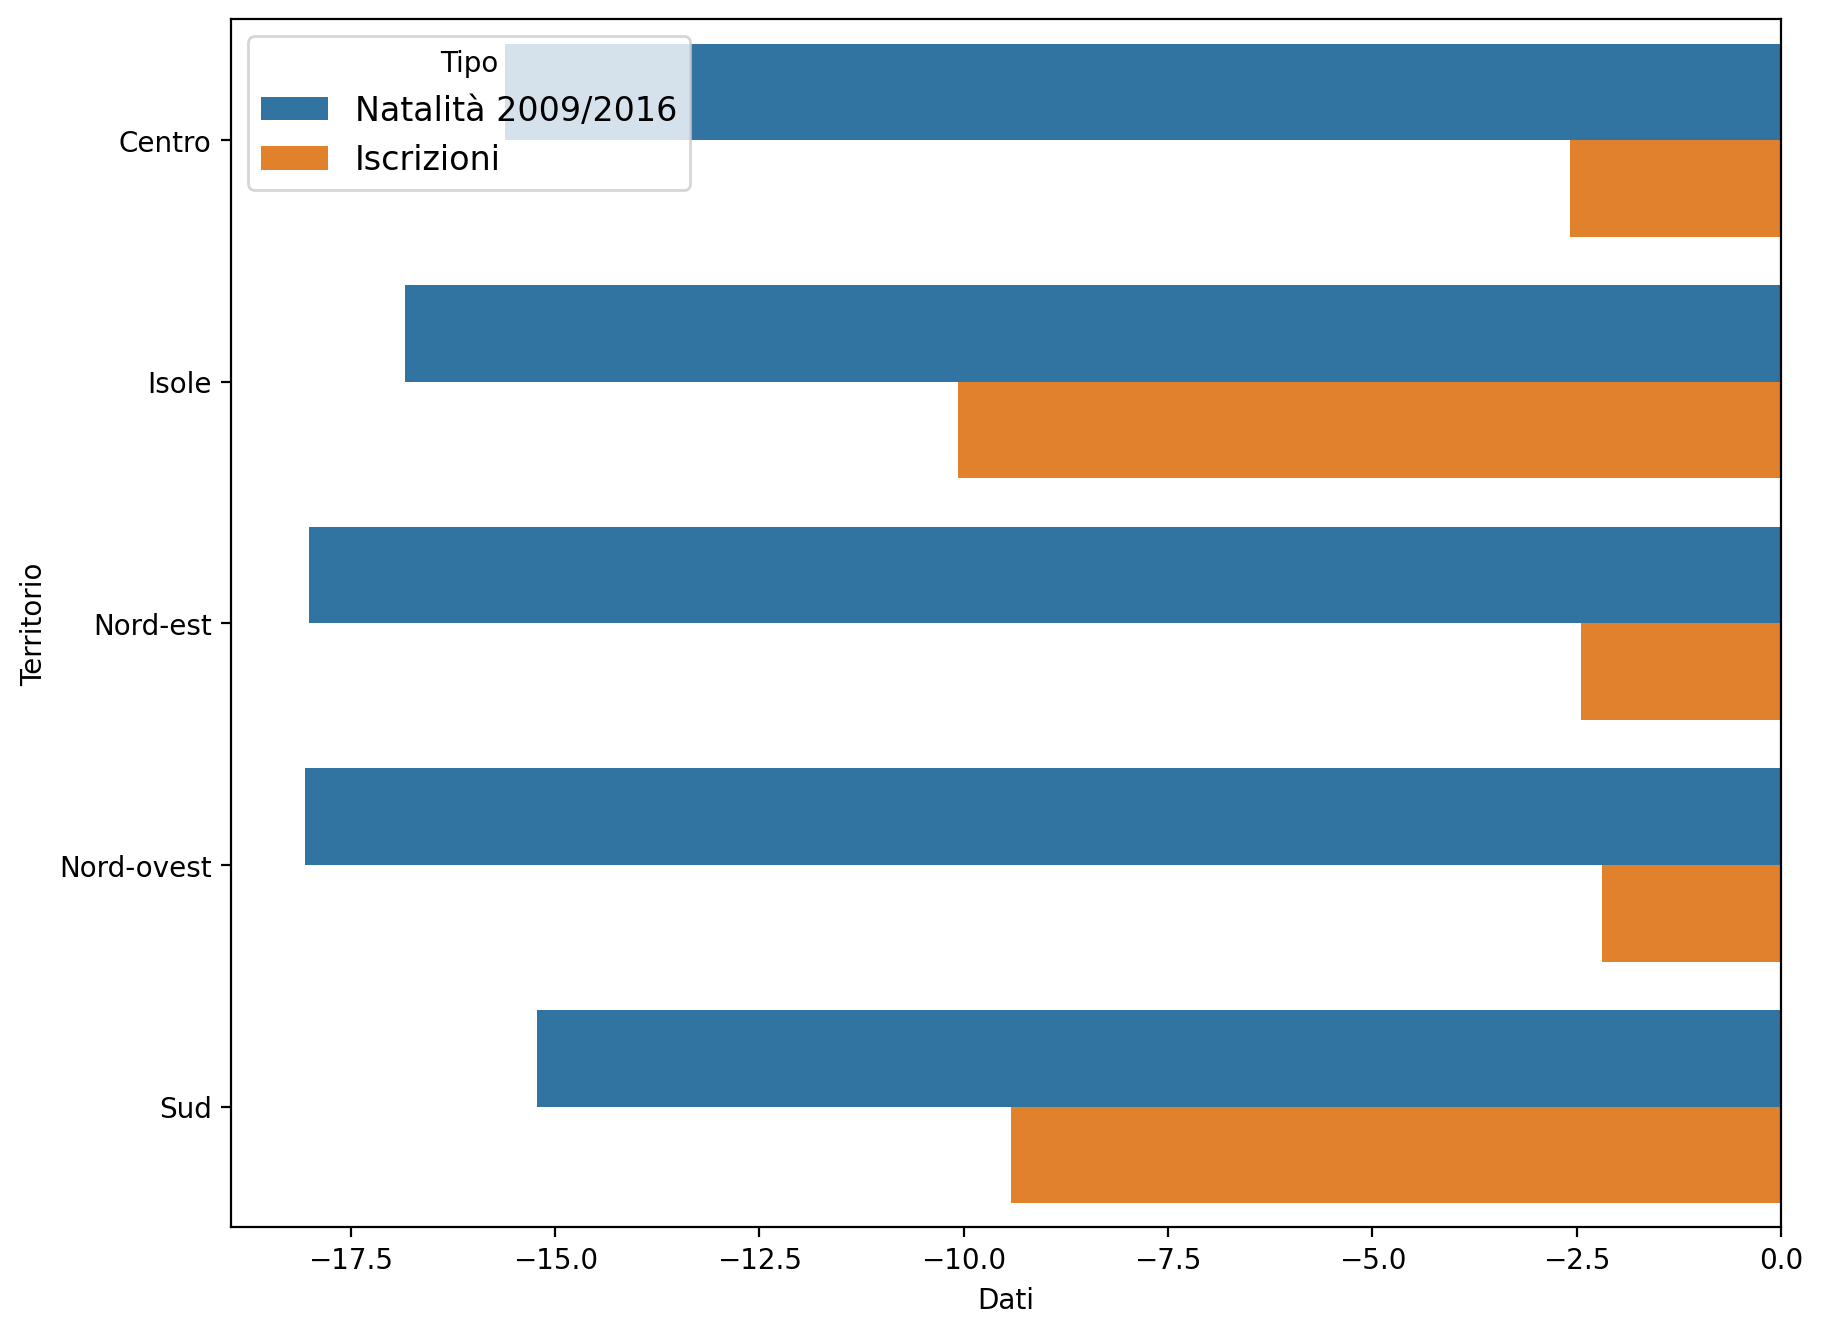

In [280]:
sns.barplot(x='Dati', y='Territorio', hue="Tipo", data=births_students) 